## Homework #5. Behaviour exploration improvement
#### Author: `VLADYSLAVA TYTARENKO`
#### Total time spent on h/w (in minutes): `1180`

---

–ê–Ω–∞–ª—ñ–∑ –∑–æ—Å–µ—Ä–µ–¥–∂–µ–Ω–æ –Ω–∞ –≥—Ä—É–ø–æ–≤–∏—Ö —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –∑ –£–∫—Ä–∞—ó–Ω–∏, –≤ —è–∫–∏—Ö –Ω–∞—Ä–∞—Ö–æ–≤—É—î—Ç—å—Å—è –ø–æ–Ω–∞–¥ 100 —Ç–∏—Å—è—á –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å. –î–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ –¥–∞–Ω—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω—ñ –Ω–∞ –ø'—è—Ç—å –æ—Å–Ω–æ–≤–Ω–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–∞ –æ–¥–Ω—É –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—é. –¶–µ:
- –ó–∞–≥–∞–ª—å–Ω–∞ –∞–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å
- –ï–º–æ—Ü—ñ–π–Ω–∏–π —Å—Ç–∞–Ω
- –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–æ –≤—Å—Ç—É–ø—É
- –ü—Ä–æ—Ü–µ—Å –≤—Å—Ç—É–ø—É
- –¢–µ–º–∏ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è
  - –ú–æ–≤–Ω–µ –ø–∏—Ç–∞–Ω–Ω—è

In [1139]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
from collections import Counter
import numpy as np
import emoji
import warnings
warnings.filterwarnings('ignore')

In [1140]:
DIALOGS_DATA_PATH = "/Users/vladislavatitarenko/Desktop/mydata/dialogs"
DIALOGS_META_DATA_PATH = "/Users/vladislavatitarenko/Desktop/mydata/dialogs_meta"
universities_PATH = "/Users/vladislavatitarenko/Desktop/mydata/keywords/universities.txt" 
spec_PATH = "/Users/vladislavatitarenko/Desktop/mydata/keywords/spec.txt" 
tone_dict_PATH = "/Users/vladislavatitarenko/Desktop/mydata/keywords/tone-dict-uk-full.csv"
categ_path = "/Users/vladislavatitarenko/Desktop/mydata/keywords/categories.txt"
warwords_PATH = "/Users/vladislavatitarenko/Desktop/mydata/keywords/warwords.txt"

In [1141]:
df_list = []
for file_path in Path(DIALOGS_DATA_PATH).glob("*.csv"):
    data = pd.read_csv(file_path)
    df_list.append(data)
df = pd.concat(df_list, ignore_index=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# **–ó–ê–ì–ê–õ–¨–ù–ê –ê–ö–¢–ò–í–ù–Ü–°–¢–¨** 

## 1. –î–∏–Ω–∞–º—ñ–∫–∞ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É —á–∞—Ç–∞—Ö –∑–∞ –º—ñ—Å—è—Ü—è–º–∏

In [1144]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

monthly_message_counts = df.groupby(['year', 'month']).size().reset_index(name='message_count')

monthly_message_counts['month_name'] = monthly_message_counts['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

df_pivot = monthly_message_counts.pivot_table(index='month_name', columns='year', values='message_count', aggfunc='sum')
df_pivot = df_pivot.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

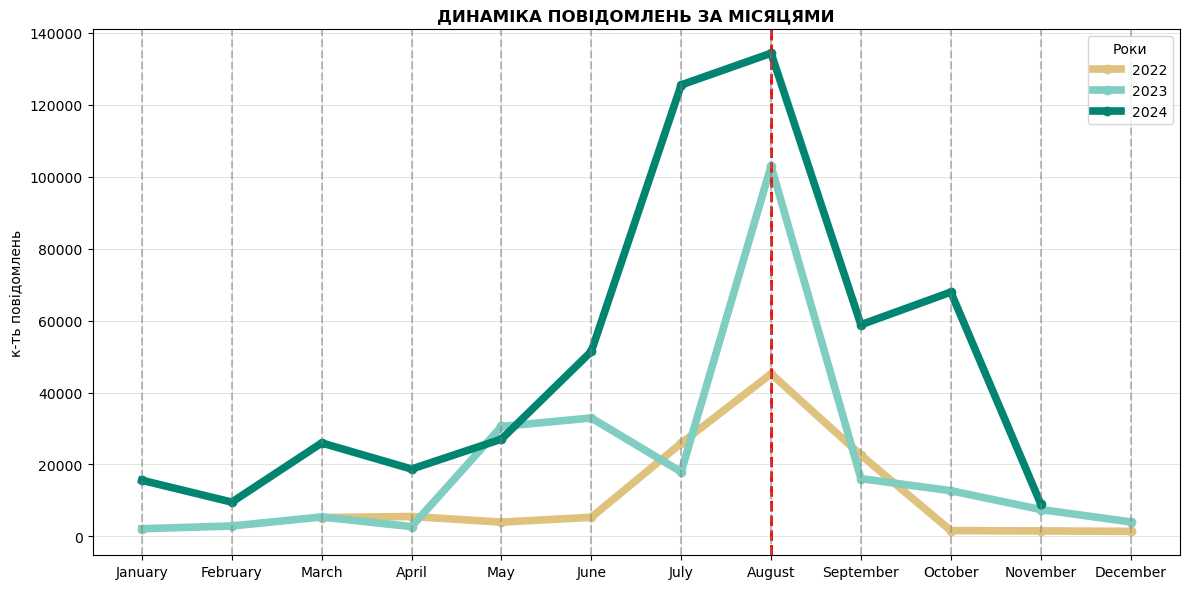

In [1553]:
plt.figure(figsize=(12, 6))

colors = ["#dfc27d", "#80cdc1", "#018571"]

for idx, year in enumerate(df_pivot.columns): 
    plt.plot(df_pivot.index, df_pivot[year], marker='o', label=f'{year}', color=colors[idx], linewidth=5.5)

    max_value = df_pivot[year].max()
    max_index = df_pivot[year].idxmax()
    
    plt.axvline(x=max_index, color="red", linestyle='--', linewidth=2, alpha=0.7)

for x_pos in range(len(df_pivot.index)):
    plt.axvline(x=x_pos, color='gray', linestyle='--', alpha=0.5)

plt.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)


plt.ylabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å')
plt.title('–î–ò–ù–ê–ú–Ü–ö–ê –ü–û–í–Ü–î–û–ú–õ–ï–ù–¨ –ó–ê –ú–Ü–°–Ø–¶–Ø–ú–ò', fontweight='bold')
plt.legend(title="–†–æ–∫–∏", fontsize=10)
plt.tight_layout()

**–í–ò–°–ù–û–í–û–ö:** –ù–∞–π–≤–∏—â–∞ –∞–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è –≤ —Å–µ—Ä–ø–Ω—ñ (–≥–ª–æ–±–∞–ª—å–Ω–∏–π –º–∞–∫—Å–∏–º—É–º –Ω–∞ –≥—Ä–∞—Ñ—ñ—Ü—ñ), —â–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–∞—î –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è–º, –æ—Å–∫—ñ–ª—å–∫–∏ —Å–∞–º–µ –≤ —Ü–µ–π –ø–µ—Ä—ñ–æ–¥ –∑–∞–≤–µ—Ä—à—É—î—Ç—å—Å—è –ø–æ–¥–∞—á–∞ –∑–∞—è–≤ –¥–æ –≤–∏—â–∏—Ö –Ω–∞–≤—á–∞–ª—å–Ω–∏—Ö –∑–∞–∫–ª–∞–¥—ñ–≤. –¶–µ —Å–ø—Ä–∏—á–∏–Ω—è—î –∑–Ω–∞—á–Ω–µ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è –∑–∞–ø–∏—Ç—ñ–≤ —Ç–∞ –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω–æ—Å—Ç—ñ —Å–µ—Ä–µ–¥ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —â–æ–¥–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤, –Ω–∞ —è–∫—ñ –≤–æ–Ω–∏ –ø–æ–¥–∞–ª–∏ –∑–∞—è–≤–∏.

## 2. –î–∏–Ω–∞–º—ñ–∫–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ —É—á–∞—Å–Ω–∏–∫—ñ–≤ —É —á–∞—Ç–∞—Ö

In [1148]:
from_id_messages = df.groupby('from_id')['date'].min().reset_index()

from_id_messages['month'] = from_id_messages['date'].dt.to_period('M')  

new_from_id_by_month = from_id_messages['month'].value_counts().sort_index()

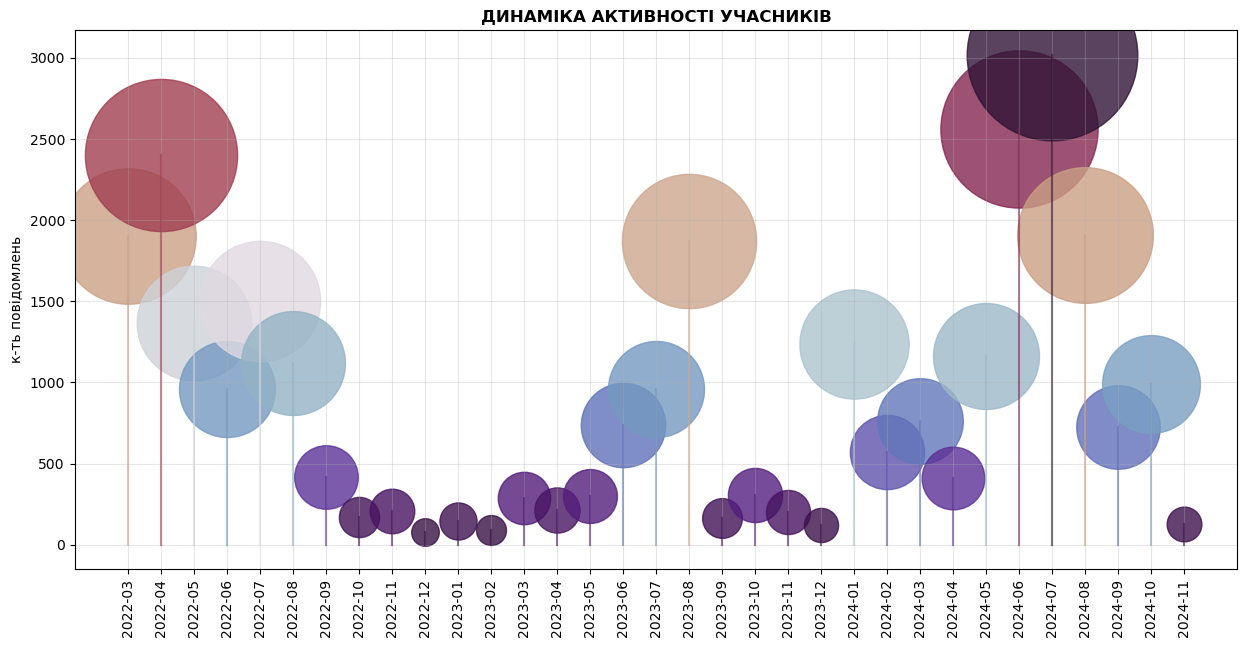

In [1551]:
plt.figure(figsize=(15, 7))

colors = plt.cm.twilight_shifted(new_from_id_by_month.values / max(new_from_id_by_month.values)) 

sizes = new_from_id_by_month.values * 5  
for i, value in enumerate(new_from_id_by_month.values):
    plt.scatter(new_from_id_by_month.index.astype(str)[i], value, s=sizes[i], c=[colors[i]], alpha=0.8)
    
    plt.plot([new_from_id_by_month.index.astype(str)[i], new_from_id_by_month.index.astype(str)[i]], [0, value], 
             color=colors[i], alpha=0.6)

plt.title("–î–ò–ù–ê–ú–Ü–ö–ê –ê–ö–¢–ò–í–ù–û–°–¢–Ü –£–ß–ê–°–ù–ò–ö–Ü–í", fontweight='bold')
plt.ylabel("–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)

**–í–ò–°–ù–û–í–û–ö:**  –í–∏—â–µ–Ω–∞–≤–µ–¥–µ–Ω–∏–π –≥—Ä–∞—Ñ—ñ–∫ –∞–Ω–∞–ª—ñ–∑—É—î –ø—Ä–∏—î–¥–Ω–∞–Ω–Ω—è –¥–æ –¥–∏—Å–∫—É—Å—ñ–π –Ω–æ–≤–∏—Ö —É—á–∞—Å–Ω–∏–∫—ñ–≤ —ñ –≤ —è–∫—ñ –º—ñ—Å—è—Ü—ñ —Ü–µ –≤—ñ–¥–±—É–≤–∞—î—Ç—å—Å—è –Ω–∞–π–±—ñ–ª—å—à –∞–∫—Ç–∏–≤–Ω–æ: 
- –∫–≤—ñ—Ç–µ–Ω—å 2022 —Ä–æ–∫—É (–Ω–æ–≤–∏–Ω–∞ –ø—Ä–æ –≤–ø—Ä–æ–≤–∞–¥–∂–µ–Ω–Ω—è –ù–ú–¢);
- —Å–µ—Ä–ø–µ–Ω—å 2023 —Ä–æ–∫—É (–Ω–∞—Å—Ç—É–ø–Ω–∏–π –µ—Ç–∞–ø –≤—Å—Ç—É–ø–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó)
- —á–µ—Ä–≤–µ–Ω—å, –ª–∏–ø–µ–Ω—å, —Å–µ—Ä–ø–µ–Ω—å 2024 —Ä–æ–∫—É (–∞–Ω–∞–ª–æ–≥—ñ—á–Ω–æ –∑ –ø—É–Ω–∫—Ç–æ–º –≤–∏—â–µ)

## 3. –î–∏–Ω–∞–º—ñ–∫–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ —É—á–∞—Å–Ω–∏–∫—ñ–≤ –∑–∞ –¥–Ω—è–º–∏ —Ç–∏–∂–Ω—è

In [1152]:
df['day_of_week'] = df['date'].dt.dayofweek

In [1153]:
activity_by_day = df.groupby('day_of_week').size()

days_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
activity_by_day.index = activity_by_day.index.map(days_mapping)

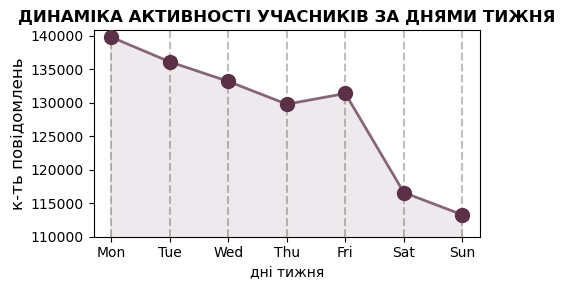

In [1154]:
plt.figure(figsize=(5, 3))

plt.scatter(activity_by_day.index, activity_by_day.values, color='#5c3047', s=100, marker='o', zorder=5)

plt.plot(activity_by_day.index, activity_by_day.values, color='#5c3047', linewidth=2, alpha=0.7, zorder=4)

for i in range(len(activity_by_day)):
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.5)

plt.fill_between(activity_by_day.index, activity_by_day.values, color='#5c3047', alpha=0.1, zorder=3)

plt.ylim(110000, max(activity_by_day.values)+1000)

plt.title("–î–ò–ù–ê–ú–Ü–ö–ê –ê–ö–¢–ò–í–ù–û–°–¢–Ü –£–ß–ê–°–ù–ò–ö–Ü–í –ó–ê –î–ù–Ø–ú–ò –¢–ò–ñ–ù–Ø", fontweight='bold')
plt.xlabel("–î–Ω—ñ —Ç–∏–∂–Ω—è", fontsize=10)
plt.ylabel("–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å", fontsize=12)

# –ü–æ–∫—Ä–∞—â–µ–Ω–Ω—è –≤–∏–≥–ª—è–¥—É
plt.tight_layout()

# –ü–æ–∫–∞–∑–∞—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫
plt.show()


In [1155]:
print(activity_by_day.to_string())

day_of_week
Mon    139771
Tue    136085
Wed    133168
Thu    129765
Fri    131355
Sat    116588
Sun    113268


**–í–ò–°–ù–û–í–û–ö:** –ù–∞–π–º–µ–Ω—à—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –ø–∏—à—É—Ç—å —É –Ω–µ–¥—ñ–ª—é, –¥–∞–ª—ñ ‚Äî —É —Å—É–±–æ—Ç—É, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –∑–Ω–∏–∂–µ–Ω—É –∞–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ —É —Ü—ñ –¥–Ω—ñ —Ç–∏–∂–Ω—è. –ú–æ–∂–Ω–∞ –ø—Ä–∏–ø—É—Å—Ç–∏—Ç–∏, —â–æ —Ü–µ –ø–æ–≤'—è–∑–∞–Ω–æ –∑ —Ç–∏–º, —â–æ –≤ —Ü—ñ –¥–Ω—ñ —É—á–∞—Å–Ω–∏–∫–∏ –±—ñ–ª—å—à–µ —Ñ–æ–∫—É—Å—É—é—Ç—å—Å—è –Ω–∞ –≤—ñ–¥–ø–æ—á–∏–Ω–∫—É —á–∏ –æ—Å–æ–±–∏—Å—Ç–∏—Ö —Å–ø—Ä–∞–≤–∞—Ö, –∞ –Ω–µ –Ω–∞ –∞–∫—Ç–∏–≤–Ω–æ–º—É —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—ñ –≤ —á–∞—Ç–∞—Ö.

## 4. –î–∏–Ω–∞–º—ñ–∫–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ —É—á–∞—Å–Ω–∏–∫—ñ–≤ –∑–∞ –¥–æ–±—É

In [1158]:
hourly_activity = [0] * 24

In [1159]:
for timestamp in df['date'].dropna():
    hour = timestamp.hour  
    hourly_activity[hour] += 1 

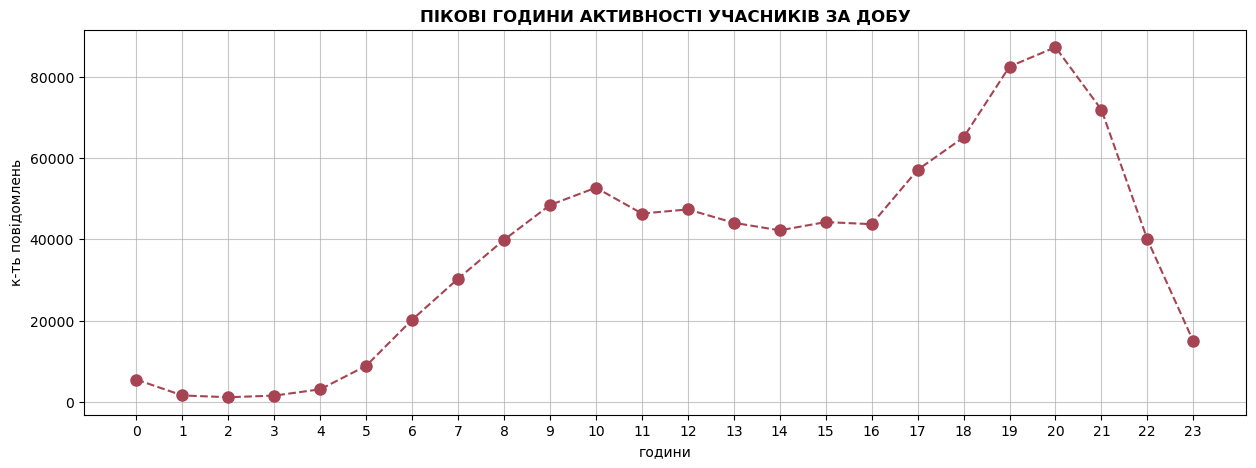

In [1160]:
plt.figure(figsize=(15, 5))
hours = range(24)  
plt.plot(hours, hourly_activity, marker='o', color='#a64453', linestyle='--', markersize=8)

plt.title('–ü–Ü–ö–û–í–Ü –ì–û–î–ò–ù–ò –ê–ö–¢–ò–í–ù–û–°–¢–Ü –£–ß–ê–°–ù–ò–ö–Ü–í –ó–ê –î–û–ë–£', fontweight='bold')
plt.xlabel('–ì–æ–¥–∏–Ω–∏')
plt.ylabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å')
plt.xticks(hours)
plt.grid(alpha=0.7)

**–í–ò–°–ù–û–í–û–ö:** –ì–ª–æ–±–∞–ª—å–Ω–∏–π –º–∞–∫—Å–∏–º—É–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –≤ —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –ø—Ä–∏–ø–∞–¥–∞—î –Ω–∞ 8 –≤–µ—á–æ—Ä–∞. –¶–µ –º–æ–∂–Ω–∞ –ø–æ—è—Å–Ω–∏—Ç–∏ —Ç–∏–º, —â–æ —Ü–µ–π —á–∞—Å —î –Ω–∞–π–±—ñ–ª—å—à –∑—Ä—É—á–Ω–∏–º –¥–ª—è —Å–ø—ñ–ª–∫—É–≤–∞–Ω–Ω—è: –∑–∞–≤–µ—Ä—à—É—î—Ç—å—Å—è –æ—Å–Ω–æ–≤–Ω–∞ —á–∞—Å—Ç–∏–Ω–∞ –∑–∞–Ω—è—Ç—å, –ø–æ–≤'—è–∑–∞–Ω–∏—Ö –∑—ñ —à–∫–æ–ª–æ—é —á–∏ –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–æ—é –¥–æ –≤—Å—Ç—É–ø—É, —ñ –∑‚Äô—è–≤–ª—è—î—Ç—å—Å—è –±—ñ–ª—å—à–µ –≤—ñ–ª—å–Ω–æ–≥–æ —á–∞—Å—É –¥–ª—è —É—á–∞—Å—Ç—ñ –≤ –¥–∏—Å–∫—É—Å—ñ—è—Ö.

---

# **–ü–Ü–î–ì–û–¢–û–í–ö–ê –î–û –í–°–¢–£–ü–£**

## 5. –ó–≥–∞–¥–∫–∏ —É—á–∞—Å–Ω–∏–∫–∞–º–∏ –ø—Ä–µ–¥–º–µ—Ç—ñ–≤ –∑ –ù–ú–¢

In [1519]:
subjects = {
    "–º–∞—Ç–µ–º–∞—Ç–∏–∫–∞": r"\b–º–∞—Ç(–µ–º–∞—Ç–∏–∫–∞|–µ–º|)\b",
    "—É–∫—Ä–∞—ó–Ω—Å—å–∫–∞ –º–æ–≤–∞": r"\b—É–∫—Ä(–∞—ó–Ω—Å—å–∫–∞ –º–æ–≤–∞|–º–æ–≤–∞|)\b",
    "—ñ—Å—Ç–æ—Ä—ñ—è –£–∫—Ä–∞—ó–Ω–∏": r"\b—ñ—Å—Ç–æ—Ä(—ñ—è|—ñ—è –£–∫—Ä–∞—ó–Ω–∏)\b",
    "–∞–Ω–≥–ª—ñ–π—Å—å–∫–∞": r"\b–∞–Ω–≥–ª(—ñ–π—Å—å–∫–∞|)\b",
    "—Ñ—ñ–∑–∏–∫–∞": r"\b—Ñ—ñ–∑(–∏–∫–∞|)\b",
    "—Ö—ñ–º—ñ—è": r"\b—Ö—ñ–º(—ñ—è|)\b",
    "–±—ñ–æ–ª–æ–≥—ñ—è": r"\b–±—ñ–æ–ª(–æ–≥—ñ—è|)\b",
    "–≥–µ–æ–≥—Ä–∞—Ñ—ñ—è": r"\b–≥–µ–æ–≥—Ä(–∞—Ñ—ñ—è|)\b",
}
subject_counts = {subject: 0 for subject in subjects}

file_subject_counts = {}

In [1521]:
all_text = ' '.join(data.astype(str).apply(lambda row: ' '.join(row), axis=1)).lower()

AttributeError: 'list' object has no attribute 'astype'

In [1523]:
        file_count = {subject: 0 for subject in subjects}

        for subject, regex in subjects.items():
            count = len(re.findall(regex, all_text))
            subject_counts[subject] += count
            file_count[subject] = count

        file_subject_counts[file_path] = file_count

sorted_subject_counts = dict(sorted(subject_counts.items(), key=lambda item: item[1], reverse=True))

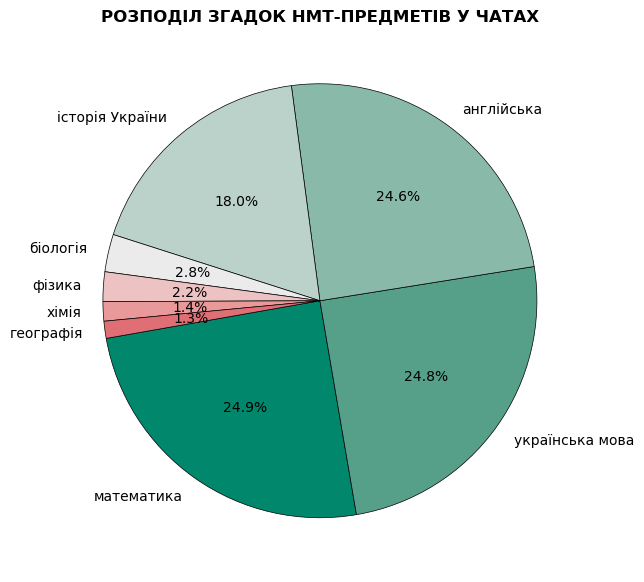

In [1531]:
colors = ['#00876c', '#56a08a', '#89b9a9', '#bad2ca', 
          '#ebebeb', '#ecc2c2', '#e9999a', '#e06f75']
plt.figure(figsize=(7, 9))
plt.pie(
    sorted_subject_counts.values(),
    labels=sorted_subject_counts.keys(),
    autopct='%1.1f%%',  
    startangle=190,  
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('–†–û–ó–ü–û–î–Ü–õ –ó–ì–ê–î–û–ö –ù–ú–¢-–ü–†–ï–î–ú–ï–¢–Ü–í –£ –ß–ê–¢–ê–•', fontweight='bold')
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ú–∞—Ç–µ–º–∞—Ç–∏–∫–∞ —î –Ω–∞–π–±—ñ–ª—å—à –∑–≥–∞–¥—É–≤–∞–Ω–∏–º –ø—Ä–µ–¥–º–µ—Ç–æ–º, –ø—ñ—Å–ª—è —á–æ–≥–æ –π–¥—É—Ç—å —É–∫—Ä–∞—ó–Ω—Å—å–∫–∞ –º–æ–≤–∞, –∞–Ω–≥–ª—ñ–π—Å—å–∫–∞ —Ç–∞ —ñ—Å—Ç–æ—Ä—ñ—è. –¶–µ —î –æ—á—ñ–∫—É–≤–∞–Ω–∏–º, –æ—Å–∫—ñ–ª—å–∫–∏ –ø–µ—Ä—à—ñ –¥–≤–∞ –ø—Ä–µ–¥–º–µ—Ç–∏, –∞ —Ç–∞–∫–æ–∂ —ñ—Å—Ç–æ—Ä—ñ—è, —î –æ–±–æ–≤'—è–∑–∫–æ–≤–∏–º–∏ –¥–ª—è —Å–∫–ª–∞–¥–∞–Ω–Ω—è –ù–ú–¢. –¢–∞–∫–æ–∂ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏ –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç–∏ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —â–æ–¥–æ –æ–±—Ä–∞–Ω–∏—Ö –ø—Ä–µ–¥–º–µ—Ç—ñ–≤, —ñ –Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à–æ—é —Å–µ—Ä–µ–¥ –Ω–∏—Ö –∑–∞–ª–∏—à–∞—î—Ç—å—Å—è –∞–Ω–≥–ª—ñ–π—Å—å–∫–∞ –º–æ–≤–∞. –ù–∞–π–º–µ–Ω—à–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–≥–∞–¥–æ–∫ –ø—Ä–æ –≥–µ–æ–≥—Ä–∞—Ñ—ñ—é –ø–æ—è—Å–Ω—é—î—Ç—å—Å—è —Ç–∏–º, —â–æ —É 2022 —Ç–∞ 2023 —Ä–æ–∫–∞—Ö —Ü–µ–π –ø—Ä–µ–¥–º–µ—Ç –Ω–µ –±—É–≤ –¥–æ—Å—Ç—É–ø–Ω–∏–π –¥–ª—è –≤–∏–±–æ—Ä—É –ø—Ä–∏ —Å–∫–ª–∞–¥–∞–Ω–Ω—ñ –ù–ú–¢.

## 6. –ó–≥–∞–¥–∫–∏ —É—á–∞—Å–Ω–∏–∫–∞–º–∏ –±–∞–ª—ñ–≤ –ù–ú–¢ 

–ü—Ä–∏ –¥–æ–¥–∞—Ç–∫–æ–≤–æ–º—É –∞–Ω–∞–ª—ñ–∑—ñ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö —Å–ª—ñ–≤ —É —á–∞—Ç–∞—Ö –±—É–ª–æ –ø–æ–º—ñ—á–µ–Ω–æ —á–∞—Å—Ç—É –≤–∂–∏–≤–∞–Ω—ñ—Å—Ç—å –æ–∫—Ä—É–≥–ª–µ–Ω–∏—Ö –±–∞–ª—ñ–≤ –ù–ú–¢ (150, 180 —ñ —Ç.–ø.). –¢–æ–º—É –±—É–ª–æ –≤–∏—Ä—ñ—à–µ–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª—ñ–∑ –∑–∞ –∫—ñ–ª—å–∫–æ–º–∞ –Ω–∞–ø—Ä—è–º–∫–∞–º–∏: 
–∞) —è–∫—ñ –±–∞–ª–∏ –Ω–∞–π—á–∞—Å—Ç—ñ—à–µ –∑–≥–∞–¥—É—é—Ç—å –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏,
–±) –Ω–∞ —è–∫—ñ –±–∞–ª–∏ —Å–∫–ª–∞–¥–∞—é—Ç—å –ù–ú–¢ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏,
–≤) –Ω–æ–≤–∏–Ω–∏ –≤—ñ–¥ –ú–û–ù, –≤ —è–∫–∏—Ö –∑–≥–∞–¥—É—é—Ç—å—Å—è –±–∞–ª–∏ –ù–ú–¢ (—è–∫ –ø–æ—Ä–æ–≥–æ–≤—ñ —Ç–∞ —ñ–Ω—à—ñ).

–¶–µ –¥–æ–∑–≤–æ–ª–∏—Ç—å –ø–æ—î–¥–Ω–∞—Ç–∏ –≤—Å—ñ —Ü—ñ –∞—Å–ø–µ–∫—Ç–∏ –≤ –æ–¥–∏–Ω –≥—Ä–∞—Ñ—ñ–∫ –¥–ª—è —á—ñ—Ç–∫—ñ—à–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É.

In [1507]:
search_nmt_phrases = ["110", "120", "130", "140", "150",
                  "160", "170", "180", "190", "200"]
word_nmt_counts = {phrase: 0 for phrase in search_nmt_phrases}

In [1509]:
if 'message' in df.columns:
    df['message'] = df['message'].apply(lambda x: re.sub(r'[^\w\s-]', '', str(x).lower()))

In [1511]:
for message in df['message']:
    for phrase in search_nmt_phrases:
        if phrase in message:
            word_nmt_counts[phrase] += 1

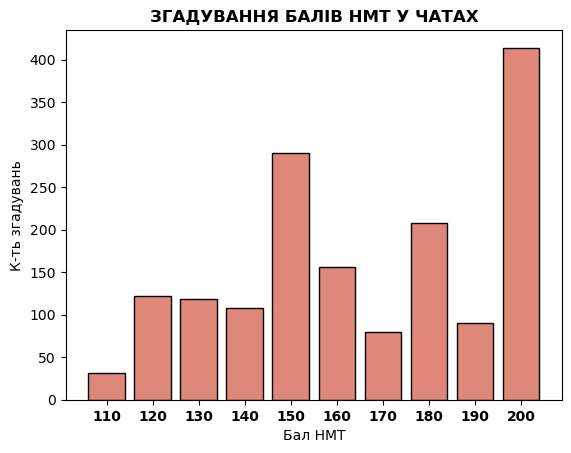

In [1517]:
plt.bar(word_nmt_counts.keys(), word_nmt_counts.values(), color= "#df8879", edgecolor='black')

plt.title('–ó–ì–ê–î–£–í–ê–ù–ù–Ø –ë–ê–õ–Ü–í –ù–ú–¢ –£ –ß–ê–¢–ê–•', fontweight='bold')
plt.xlabel('–ë–∞–ª –ù–ú–¢')
plt.ylabel('–ö-—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å')
plt.xticks(fontweight='bold')
plt.show()

**–í–ò–°–ù–û–í–û–ö:** 200 —Ç–∞ 150 –±–∞–ª—ñ–≤ —î –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏–º–∏ –±–∞–ª–∞–º–∏ —É –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è—Ö —Å–µ—Ä–µ–¥ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤. 150 –±–∞–ª—ñ–≤, —É —Å–≤–æ—é —á–µ—Ä–≥—É, —î –º—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–º –ø–æ—Ä–æ–≥–æ–º –¥–ª—è –æ—Ç—Ä–∏–º–∞–Ω–Ω—è –≥—Ä–∞–Ω—Ç—É, —â–æ —Ä–æ–±–∏—Ç—å –π–æ–≥–æ –≤–∞–∂–ª–∏–≤–æ—é –º–µ—Ç–æ—é –¥–ª—è –±–∞–≥–∞—Ç—å–æ—Ö –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤. –¢–∞–∫–∞ —á–∞—Å—Ç–æ—Ç–∞ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –∑–Ω–∞—á–Ω—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –≤–∏–ø—É—Å–∫–Ω–∏–∫—ñ–≤, —è–∫—ñ –æ—Ä—ñ—î–Ω—Ç—É—é—Ç—å—Å—è —Å–∞–º–µ –Ω–∞ —Ü–µ–π –º—ñ–Ω—ñ–º—É–º, —â–æ–± –æ—Ç—Ä–∏–º–∞—Ç–∏ –º–æ–∂–ª–∏–≤—ñ—Å—Ç—å –Ω–∞–≤—á–∞—Ç–∏—Å—è –±–µ–∑–æ–ø–ª–∞—Ç–Ω–æ. –¶–µ —Ç–∞–∫–æ–∂ –º–æ–∂–µ –±—É—Ç–∏ –ø–æ–≤'—è–∑–∞–Ω–æ –∑ –¥–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—é –∑–∞–≤–¥–∞–Ω—å –∞–±–æ –∑–∞–≥–∞–ª—å–Ω–æ—é —Å–∫–ª–∞–¥–Ω—ñ—Å—Ç—é —Ç–µ—Å—Ç—É.

## 7. –ó–≥–∞–¥–∫–∏ —É—á–∞—Å–Ω–∏–∫–∞–º–∏ —Ñ–æ—Ä–º –Ω–∞–≤—á–∞–Ω–Ω—è –∑–∞ —Ä–æ–∫–∞–º–∏

–ü–æ—Å–∏–ª–∞—é—á–∏—Å—å –Ω–∞ –¥–æ–¥–∞—Ç–∫–æ–≤–∏–π –∞–Ω–∞–ª—ñ–∑ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö —Å–ª—ñ–≤ (—è–∫–∏–π –Ω–µ –±—É–ª–æ –≤–∫–ª—é—á–µ–Ω–æ –¥–æ –ø—ñ–¥–∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ü—å–æ–≥–æ –¥–æ—Å–ª—ñ–¥–∂–µ–Ω–Ω—è), –º–æ–∂–Ω–∞ –≤—ñ–¥–∑–Ω–∞—á–∏—Ç–∏, —â–æ —Ñ–æ—Ä–º–∏ –Ω–∞–≤—á–∞–Ω–Ω—è, —Ç–∞–∫—ñ —è–∫ –±—é–¥–∂–µ—Ç–Ω–∞, –∫–æ–Ω—Ç—Ä–∞–∫—Ç–Ω–∞ —Ç–∞ –≥—Ä–∞–Ω—Ç–∏, —á–∞—Å—Ç–æ –∑–≥–∞–¥—É–≤–∞–ª–∏—Å—è —É—á–∞—Å–Ω–∏–∫–∞–º–∏ –≤ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è—Ö. –¶–µ —î –≤–∞–∂–ª–∏–≤–∏–º –¥–ª—è –æ—Ü—ñ–Ω–∫–∏ –æ—Ä—ñ—î–Ω—Ç–æ–≤–∞–Ω–æ—Å—Ç—ñ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –Ω–∞ –ø–µ–≤–Ω—É —Ñ–æ—Ä–º—É –Ω–∞–≤—á–∞–Ω–Ω—è —Ç–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –∑–∞–≥–∞–ª—å–Ω–æ–≥–æ —Ä—ñ–≤–Ω—è –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∏ –∑ –æ—Ç—Ä–∏–º–∞–Ω–∏–º–∏ –±–∞–ª–∞–º–∏ (–ø. 6), —è–∫—ñ –¥–∞—é—Ç—å –º–æ–∂–ª–∏–≤—ñ—Å—Ç—å –≤—Å—Ç—É–ø–∏—Ç–∏ –Ω–∞ –æ–¥–Ω—É –∑ –Ω–∞–≤–µ–¥–µ–Ω–∏—Ö —Ñ–æ—Ä–º –Ω–∞–≤—á–∞–Ω–Ω—è. 

In [1499]:
search_words = ["–±—é–¥–∂–µ—Ç", "–∫–æ–Ω—Ç—Ä–∞–∫—Ç", "–≥—Ä–∞–Ω—Ç"]
search_words = [word.lower() for word in search_words]

monthly_counts = {word: {2022: [0] * 12, 2023: [0] * 12, 2024: [0] * 12} for word in search_words}

In [1501]:
df['message'] = df['message'].apply(lambda x: re.sub(r'[^\w\s-]', '', str(x).lower()))

In [1503]:
for _, row in df.iterrows():
    message = row['message']
    timestamp = row['date']

    if pd.notnull(timestamp):
        year = timestamp.year
        month = timestamp.month - 1  # –î–ª—è —Å–ø–∏—Å–∫—É (0-11)
    if year in [2022, 2023, 2024]:
      for word in search_words:
        if word in message:
          monthly_counts[word][year][month] += 1

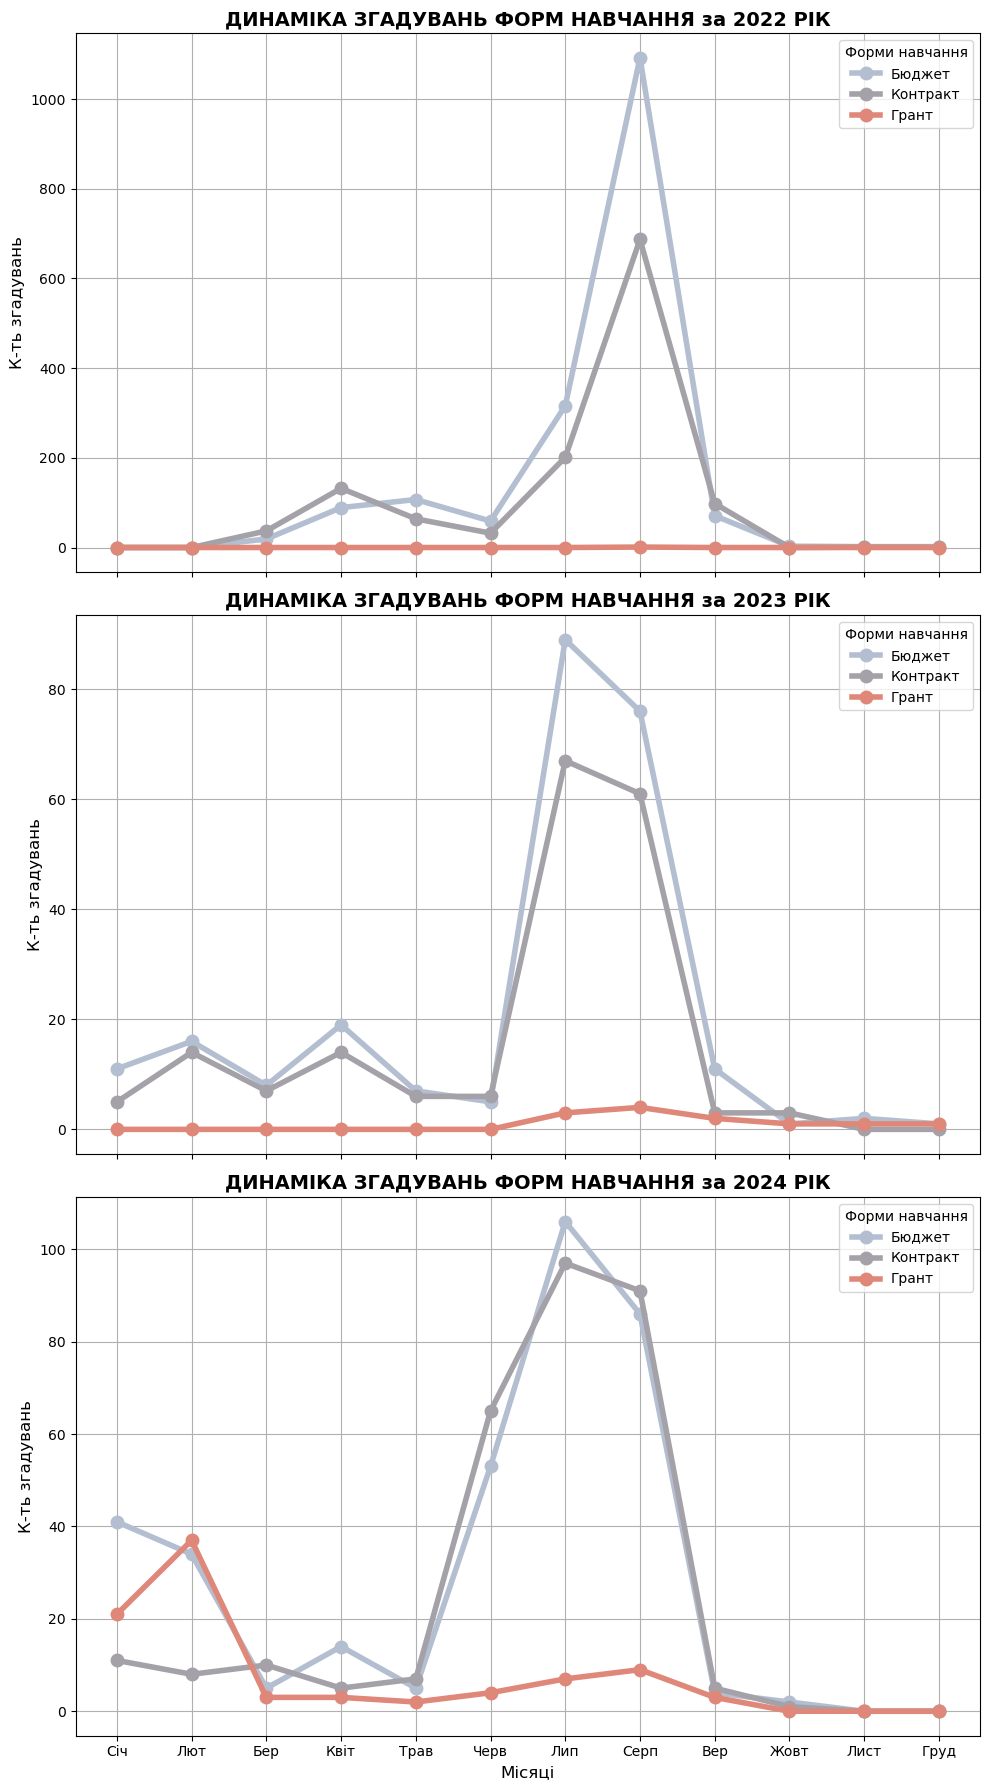

In [1549]:
colors = ["#b3bfd1", "#a4a2a8", "#df8879"]

fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

years = [2022, 2023, 2024]

color_map = {search_words[i]: colors[i] for i in range(len(search_words))}

# –ü–æ–±—É–¥–æ–≤–∞ –ø—ñ–¥–≥—Ä–∞—Ñ—ñ–∫—ñ–≤ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ —Ä–æ–∫—É
for idx, year in enumerate(years):
    ax = axes[idx]
    for word in search_words:
        ax.plot(
            range(1, 13), 
            monthly_counts[word][year], 
            label=word.capitalize(), 
            linewidth=4, 
            color=color_map[word],  # –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ –ø—Ä–∞–≤–∏–ª—å–Ω–∏–π –∫–æ–ª—ñ—Ä –¥–ª—è —Å–ª–æ–≤–∞
            marker='o',  
            markersize=8,  
            markerfacecolor=color_map[word],  
            markeredgewidth=2  
        )

    ax.set_title(f'–î–ò–ù–ê–ú–Ü–ö–ê –ó–ì–ê–î–£–í–ê–ù–¨ –§–û–†–ú –ù–ê–í–ß–ê–ù–ù–Ø –∑–∞ {year} –†–Ü–ö', fontsize=14, fontweight='bold')
    ax.set_ylabel('–ö-—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å', fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['–°—ñ—á', '–õ—é—Ç', '–ë–µ—Ä', '–ö–≤—ñ—Ç', '–¢—Ä–∞–≤', '–ß–µ—Ä–≤', '–õ–∏–ø', '–°–µ—Ä–ø', '–í–µ—Ä', '–ñ–æ–≤—Ç', '–õ–∏—Å—Ç', '–ì—Ä—É–¥'])
    ax.legend(title='–§–æ—Ä–º–∏ –Ω–∞–≤—á–∞–Ω–Ω—è', fontsize=10)
    ax.grid(True)

axes[-1].set_xlabel('–ú—ñ—Å—è—Ü—ñ', fontsize=12)

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ü–æ–º—ñ—Ç–Ω–∞ —Ä—ñ–∑–Ω–∏—Ü—è –≤ –æ—Ä—ñ—î–Ω—Ç–æ–≤–∞–Ω–æ—Å—Ç—ñ —É—á–∞—Å–Ω–∏–∫—ñ–≤ –Ω–∞ –Ω–∞–≤—á–∞–Ω–Ω—è –∑–∞ –±—é–¥–∂–µ—Ç–Ω–æ—é —Ñ–æ—Ä–º–æ—é —É 2022 —ñ 2023 —Ä–æ–∫–∞—Ö: –≤ 2022 —Ä–æ—Ü—ñ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏ –ø—Ä–∏–±–ª–∏–∑–Ω–æ –≤ 1,5 —Ä–∞–∑–∏ —á–∞—Å—Ç—ñ—à–µ –∑–≥–∞–¥—É–≤–∞–ª–∏ —Å–∞–º–µ —ó—ó, –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ 2023 —Ä–æ–∫–æ–º. –¶–µ –º–æ–∂–Ω–∞ –ø–æ—è—Å–Ω–∏—Ç–∏ –ø–æ–ª–µ–≥—à–µ–Ω–æ—é —Ñ–æ—Ä–º–æ—é —Ç–µ—Å—Ç—É–≤–∞–Ω–Ω—è —á–µ—Ä–µ–∑ –≤–ø—Ä–æ–≤–∞–¥–∂–µ–Ω–Ω—è –ù–ú–¢, —Ç–æ–¥—ñ —è–∫ —É 2023 —Ä–æ—Ü—ñ –ø–æ—Å—Ç—É–ø–æ–≤–æ –ø–æ—á–∞–ª–∏ –≤—ñ–¥–Ω–æ–≤–ª—é–≤–∞—Ç–∏ —É—Å–∫–ª–∞–¥–Ω–µ–Ω—ñ –∑–∞–≤–¥–∞–Ω–Ω—è.

–£ 2024 —Ä–æ—Ü—ñ –ª—ñ–Ω—ñ—è, —â–æ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—î –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è –≥—Ä–∞–Ω—Ç–æ–≤–æ—ó —Ñ–æ—Ä–º–∏ –Ω–∞–≤—á–∞–Ω–Ω—è, –ø–æ—á–∏–Ω–∞—î –∑—Ä–æ—Å—Ç–∞—Ç–∏ –ø—ñ–¥ —á–∞—Å –≤—Å—Ç—É–ø—É (–ª–∏–ø–µ–Ω—å-—Å–µ—Ä–ø–µ–Ω—å). –¶–µ –ø–æ–≤'—è–∑–∞–Ω–æ –∑ –Ω–æ–≤–∏–º –∑–∞–∫–æ–Ω–æ–º –ú–û–ù —â–æ–¥–æ —Ñ—ñ–Ω–∞–Ω—Å–æ–≤–æ—ó –ø—ñ–¥—Ç—Ä–∏–º–∫–∏ —Å—Ç—É–¥–µ–Ω—Ç—ñ–≤ —á–µ—Ä–µ–∑ –≥—Ä–∞–Ω—Ç–∏. –¢–æ–º—É –∫–æ–Ω—Ç—Ä–∞–∫—Ç–Ω–∞ —Ñ–æ—Ä–º–∞ –Ω–∞–≤—á–∞–Ω–Ω—è –∑–Ω–æ–≤—É –ø–æ—Å—Ç—É–ø–∞—î—Ç—å—Å—è –±—é–¥–∂–µ—Ç–Ω—ñ–π, –æ—Å–∫—ñ–ª—å–∫–∏ –±—ñ–ª—å—à—ñ—Å—Ç—å –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –æ—Ä—ñ—î–Ω—Ç–æ–≤–∞–Ω–∞ –Ω–∞ –ø–æ–¥–∞–Ω–Ω—è –∑–∞—è–≤ –Ω–∞ –±—é–¥–∂–µ—Ç–Ω—É –∞–±–æ –≥—Ä–∞–Ω—Ç–æ–≤—É —Ñ–æ—Ä–º–∏ –Ω–∞–≤—á–∞–Ω–Ω—è.

## 8. –ó–≥–∞–¥–∫–∏ –ö–í–û–¢–ê-1 / –ö–í–û–¢–ê-2 –∑–∞ —Ä–æ–∫–∞–º–∏

–¶–µ –ø–∏—Ç–∞–Ω–Ω—è –≤–∏–Ω–∏–∫–ª–æ –Ω–∞ –ø—ñ–¥—Å—Ç–∞–≤—ñ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤ –∑ –ö–í–û–¢–û–Æ-2 –ø—ñ—Å–ª—è –ø–æ–≤–Ω–æ–º–∞—Å—à—Ç–∞–±–Ω–æ–≥–æ –≤—Ç–æ—Ä–≥–Ω–µ–Ω–Ω—è –≤ –£–∫—Ä–∞—ó–Ω—É 24 –ª—é—Ç–æ–≥–æ 2022 —Ä–æ–∫—É. –ó–∞ —Å–ø–æ—Å—Ç–µ—Ä–µ–∂–µ–Ω–Ω—è–º–∏ —Ç–∞ –æ–ø–∏—Ç—É–≤–∞–Ω–Ω—è–º–∏ –∑–Ω–∞–π–æ–º–∏—Ö, –¥–æ 2022 —Ä–æ–∫—É –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏ –º–∞–ª–∏ –æ–±–º–µ–∂–µ–Ω–µ –∑–Ω–∞–Ω–Ω—è —â–æ–¥–æ —É–º–æ–≤ —Ç–∞ –º–æ–∂–ª–∏–≤–æ—Å—Ç–µ–π –æ—Ç—Ä–∏–º–∞–Ω–Ω—è –ø—ñ–ª—å–≥ –ø—Ä–∏ –≤—Å—Ç—É–ø—ñ. –¢–æ–º—É –≤–∞–∂–ª–∏–≤–∏–º —î –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –¥–∞–Ω–∏—Ö —â–æ–¥–æ –∑–≥–∞–¥—É–≤–∞–Ω—å –ø—Ä–æ –ø—ñ–ª—å–≥–∏ –º—ñ–∂ 2022 —ñ –Ω–∞—Å—Ç—É–ø–Ω–∏–º–∏ —Ä–æ–∫–∞–º–∏, —â–æ–± –æ—Ü—ñ–Ω–∏—Ç–∏ –∑–º—ñ–Ω—É –æ–±—ñ–∑–Ω–∞–Ω–æ—Å—Ç—ñ —Ç–∞ —ñ–Ω—Ç–µ—Ä–µ—Å—É —Å–µ—Ä–µ–¥ –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤.
### _–ù–∞—Å–∫—ñ–ª—å–∫–∏ –∑—Ä–æ—Å–ª–æ –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è –ø—ñ–ª—å–≥ –ø—Ä–∏ –≤—Å—Ç—É–ø—ñ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ 2022 —Ä–æ–∫–æ–º?_ 

In [1186]:
search_kv_phrases = ["–∫–≤–æ—Ç–∞-1", "–∫–≤–æ—Ç–∞-2"]
search_kv_phrases = [phrase.lower() for phrase in search_kv_phrases]

yearly_counts = {phrase: {2022: 0, 2024: 0} for phrase in search_kv_phrases}

In [1187]:
df['combined_text'] = df.astype(str).apply(lambda row: ' '.join(row), axis=1)

In [1188]:
 for _, row in df.iterrows():
            timestamp = row['date']
            if pd.notnull(timestamp):
                year = timestamp.year
                if year in yearly_counts[search_kv_phrases[0]]:  # –û–±–º–µ–∂–µ–Ω–Ω—è –Ω–∞ —Ä–æ–∫–∏ 2022 —ñ 2024
                    for phrase in search_kv_phrases:
                        yearly_counts[phrase][year] += str(row['combined_text']).lower().count(phrase)

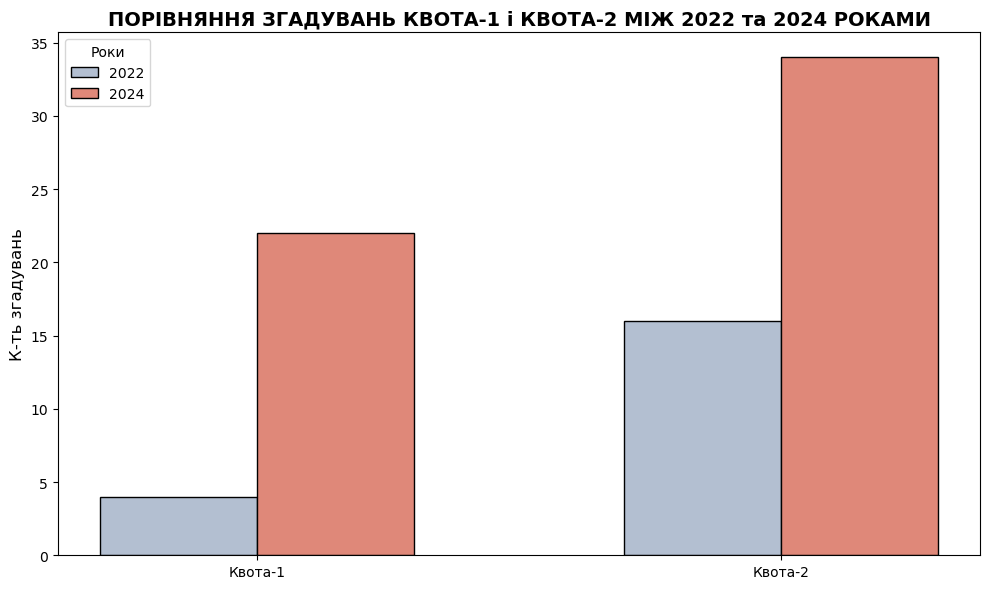

In [1547]:
labels = search_kv_phrases  
years = [2022, 2024]
x = range(len(labels))  

fig, ax = plt.subplots(figsize=(10, 6))

# –î–∞–Ω—ñ –¥–ª—è –≥—Ä–∞—Ñ—ñ–∫–∞
bar_width = 0.3
colors = ["#b3bfd1", "#df8879"]  

for idx, year in enumerate(years):
    counts = [yearly_counts[phrase][year] for phrase in labels]
    ax.bar([pos + idx * bar_width - bar_width / 2 for pos in x], counts, bar_width, label=f"{year}", color=colors[idx], edgecolor='black')

ax.set_ylabel('–ö-—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å', fontsize=12)
ax.set_title('–ü–û–†–Ü–í–ù–Ø–ù–ù–Ø –ó–ì–ê–î–£–í–ê–ù–¨ –ö–í–û–¢–ê-1 —ñ –ö–í–û–¢–ê-2 –ú–Ü–ñ 2022 —Ç–∞ 2024 –†–û–ö–ê–ú–ò', fontsize=14, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels([phrase.capitalize() for phrase in labels])  

ax.legend(title="–†–æ–∫–∏", fontsize=10)

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –°–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è —è–≤–Ω–∞ —Ç–µ–Ω–¥–µ–Ω—Ü—ñ—è –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –∑–≥–∞–¥—É–≤–∞–Ω—å –≤ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∞–º–∏ —â–æ–¥–æ –ø—ñ–ª—å–≥ –ø—Ä–∏ –≤—Å—Ç—É–ø—ñ –º—ñ–∂ 2022 —Ç–∞ 2024 —Ä–æ–∫–∞–º–∏. –ó–æ–∫—Ä–µ–º–∞, –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è –ø—Ä–æ –ö–í–û–¢–ê-1 –∑—Ä–æ—Å–ª–æ –≤ 4,5 —Ä–∞–∑–∏, –∞ –ø—Ä–æ –ö–í–û–¢–ê-2 ‚Äî –≤ 2 —Ä–∞–∑–∏. –¶–µ–π –≥—Ä–∞—Ñ—ñ–∫ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î –ø—Ä–∏–ø—É—â–µ–Ω–Ω—è, —â–æ –ø—ñ—Å–ª—è –ø–æ–≤–Ω–æ–º–∞—Å—à—Ç–∞–±–Ω–æ–≥–æ –≤—Ç–æ—Ä–≥–Ω–µ–Ω–Ω—è –±—ñ–ª—å—à–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –¥—ñ–∑–Ω–∞–ª–∞—Å—è (—ñ –ø—Ä–æ–¥–æ–≤–∂—É—î –¥—ñ–∑–Ω–∞–≤–∞—Ç–∏—Å—è) –ø—Ä–æ —Ç–∞–∫—É –º–æ–∂–ª–∏–≤—ñ—Å—Ç—å, —â–æ –æ—Å–æ–±–ª–∏–≤–æ –ø–æ–º—ñ—Ç–Ω–æ –≤ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—ñ –∑–∞–ø–∏—Ç—ñ–≤ —â–æ–¥–æ –ö–í–û–¢–ê-1.

---

# **–ï–ú–û–¶–Ü–ô–ù–ò–ô –°–¢–ê–ù**

## 9. –¢–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—å —É—á–∞—Å–Ω–∏–∫—ñ–≤ —á–∞—Ç—É

–î–ª—è –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è –ø–µ—Ä—ñ–æ–¥—É –∑ –Ω–∞–π–≤–∏—â–∏–º —Ä—ñ–≤–Ω–µ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ—ó —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–æ —Å–ª–æ–≤–Ω–∏–∫ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ —É–∫—Ä–∞—ó–Ω—Å—å–∫–∏—Ö —Å–ª—ñ–≤, –¥–µ –∑–Ω–∞—á–µ–Ω–Ω—è "-2" –ø–æ–∑–Ω–∞—á–∞—î –Ω–∞–π–±—ñ–ª—å—à –Ω–µ–≥–∞—Ç–∏–≤–Ω—É —Ç–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—å, –∞ "2" - –Ω–∞–π–±—ñ–ª—å—à –ø–æ–∑–∏—Ç–∏–≤–Ω—É.
### _–í —è–∫–∏–π –ø–µ—Ä—ñ–æ–¥ –≤—Å—Ç—É–ø–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó —Ä—ñ–≤–µ–Ω—å –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ—ó —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ –Ω–∞–π–≤–∏—â–∏–π?_

In [1195]:
tone_dict = pd.read_csv(tone_dict_PATH, index_col='word')

In [1196]:
df_2023 = df[df['date'].dt.year == 2023]

In [1197]:
def calculate_tone_score(text, tone_dict):
    if isinstance(text, str):  # –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞, —á–∏ —î —Ç–µ–∫—Å—Ç —Ä—è–¥–∫–æ–º
        words = text.split()
        tone_score = sum(tone_dict.loc[word, 'sentiment'] for word in words if word in tone_dict.index)
        return tone_score
    else:
        return 0

In [1198]:
df_2023 = df_2023.copy()
df_2023['tone_score'] = df_2023['message'].apply(lambda x: calculate_tone_score(x, tone_dict))
df_2023['month'] = df_2023['date'].dt.month

monthly_tone = df_2023.groupby('month')['tone_score'].mean()

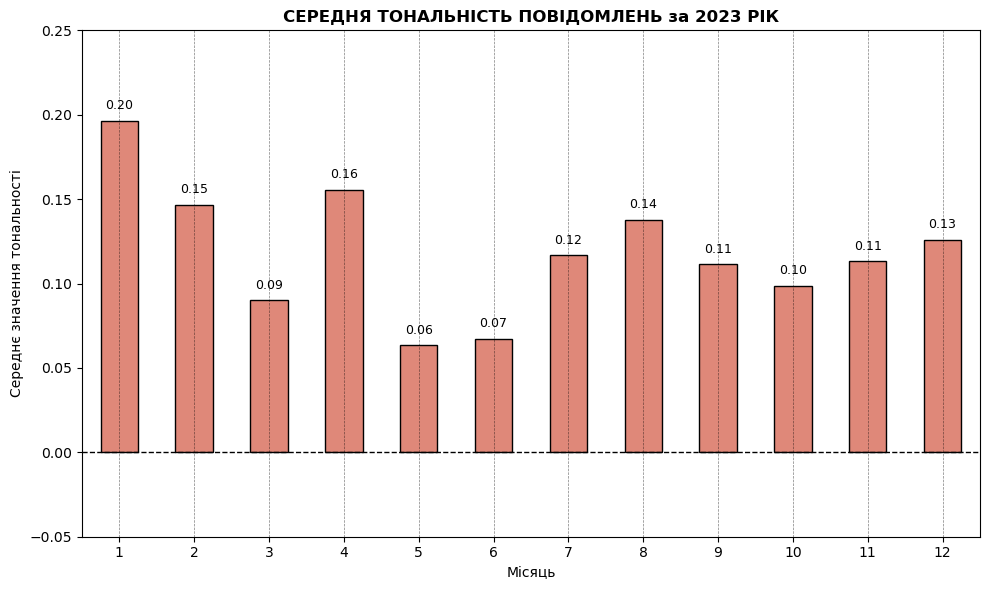

In [1578]:
plt.figure(figsize=(10, 6))

monthly_tone.plot(kind='bar', color='#df8879', edgecolor='black')

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.ylim(-0.05, 0.25)
plt.title('–°–ï–†–ï–î–ù–Ø –¢–û–ù–ê–õ–¨–ù–Ü–°–¢–¨ –ü–û–í–Ü–î–û–ú–õ–ï–ù–¨ –∑–∞ 2023 –†–Ü–ö', fontweight='bold')
plt.xlabel('–ú—ñ—Å—è—Ü—å')
plt.ylabel('–°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ')

plt.xticks(rotation=0)

plt.grid(True, which='both', axis='x', color='black', linestyle='--', linewidth=0.5, alpha=0.5)
for index, value in enumerate(monthly_tone):
    plt.text(index, value + 0.005, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

 > –ü–æ—è—Å–Ω–µ–Ω–Ω—è –¥–æ –≥—Ä–∞—Ñ—ñ–∫—É: –¥–æ—Å–ª—ñ–¥–∂—É—î—Ç—å—Å—è —Å–µ—Ä–µ–¥–Ω—è —Ç–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É—á–∞—Å–Ω–∏–∫—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º 2023 —Ä–æ–∫—É, –æ—Å–∫—ñ–ª—å–∫–∏ –¥–∞–Ω—ñ –∑–∞ 2022 —Ç–∞ 2024 —Ä–æ–∫–∏ –Ω–µ –±—É–ª–∏ –± –Ω–∞—Å—Ç—ñ–ª—å–∫–∏ —Ü—ñ–ª—ñ—Å–Ω–∏–º–∏. –ß–∏–º –±–ª–∏–∂—á–µ –∑–Ω–∞—á–µ–Ω–Ω—è –¥–æ –Ω—É–ª—è, —Ç–∏–º –±—ñ–ª—å—à –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ—é —î —Ç–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—å, —â–æ —ñ —î –º–µ—Ç–æ—é —Ü—å–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É.

**–í–ò–°–ù–û–í–û–ö:** –ó–∞ –≥—Ä–∞—Ñ—ñ–∫–æ–º —Ç—Ä–∞–≤–µ–Ω—å –≤–∏—è–≤–ª—è—î—Ç—å—Å—è –º—ñ—Å—è—Ü–µ–º –∑ –Ω–∞–π–±—ñ–ª—å—à –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ—é —Ç–æ–Ω–∞–ª—å–Ω—ñ—Å—Ç—é –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ —ñ–Ω—à–∏–º–∏ –º—ñ—Å—è—Ü—è–º–∏ —Ä–æ–∫—É, –¥–∞–ª—ñ –π–¥—É—Ç—å —á–µ—Ä–≤–µ–Ω—å, –±–µ—Ä–µ–∑–µ–Ω—å —Ç–∞ –∂–æ–≤—Ç–µ–Ω—å. –£ —Å–µ—Ä–µ–¥–∏–Ω—ñ —Ç—Ä–∞–≤–Ω—è (–∞–±–æ —á–µ—Ä–≤–Ω—ñ) —Ä–æ–∑–ø–æ—á–∏–Ω–∞—é—Ç—å—Å—è —ñ—Å–ø–∏—Ç–∏ —É –≤–∏–ø—É—Å–∫–Ω–∏–∫—ñ–≤, —â–æ, –π–º–æ–≤—ñ—Ä–Ω–æ, —î –æ—Å–Ω–æ–≤–Ω–æ—é –ø—Ä–∏—á–∏–Ω–æ—é –Ω–µ–≥–∞—Ç–∏–≤–Ω–∏—Ö –µ–º–æ—Ü—ñ–π –≤ —Ü–µ–π –ø–µ—Ä—ñ–æ–¥.

–¶–µ–π –∞–Ω–∞–ª—ñ–∑ –¥–æ–∑–≤–æ–ª—è—î –≤–∏–∑–Ω–∞—á–∏—Ç–∏ –ø–µ—Ä—ñ–æ–¥, –∫–æ–ª–∏ —É –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –¥–æ–º—ñ–Ω—É—é—Ç—å –µ–º–æ—Ü—ñ—ó –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ—ó —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ, —Ç–∞–∫—ñ —è–∫ —Å—É–º, —Ä–æ–∑—á–∞—Ä—É–≤–∞–Ω–Ω—è, –≥–Ω—ñ–≤, —Å—Ç—Ä–∞—Ö —Ç–æ—â–æ. –¢–∞–∫–∏–º —á–∏–Ω–æ–º, –º–æ–∂–Ω–∞ –ø—ñ–¥—Å—É–º—É–≤–∞—Ç–∏, —â–æ –ø–µ—Ä—ñ–æ–¥ –≤—Å—Ç—É–ø–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó ‚Äî –∑–æ–∫—Ä–µ–º–∞, —á–∞—Å –Ω–∞–ø–∏—Å–∞–Ω–Ω—è —ñ—Å–ø–∏—Ç—ñ–≤ ‚Äî —î –Ω–∞–π–µ–º–æ—Ü—ñ–π–Ω—ñ—à–∏–º –¥–ª—è –ø—ñ–¥–ª—ñ—Ç–∫—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º —Ä–æ–∫—É.

## 10. –†—ñ–≤–µ–Ω—å —Å—Ç—Ä–µ—Å—É —Å–µ—Ä–µ–¥ —É—á–∞—Å–Ω–∏–∫—ñ–≤ —á–∞—Ç—ñ–≤

–Ø–∫ –ø—Ä–æ–¥–æ–≤–∂–µ–Ω–Ω—è –ø.9, –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É—î–º–æ —Ä—ñ–≤–µ–Ω—å —Å—Ç—Ä–µ—Å—É —Å–µ—Ä–µ–¥ —É—á–∞—Å–Ω–∏–∫—ñ–≤ —á–∞—Ç—É, –∑–æ–∫—Ä–µ–º–∞, —á–∏ –∑–±—ñ–≥–∞—î—Ç—å—Å—è —Å—Ç—Ä–µ—Å–æ–≤–∏–π —Å—Ç–∞–Ω –∑ –ø–µ—Ä—ñ–æ–¥–æ–º –Ω–∞–ø–∏—Å–∞–Ω–Ω—è —ñ—Å–ø–∏—Ç—ñ–≤, —á–∏ –ø—Ä–∏–ø–∞–¥–∞—î –Ω–∞ –Ω–∞—Å—Ç—É–ø–Ω—ñ –µ—Ç–∞–ø–∏ –≤—Å—Ç—É–ø–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó. 

In [1204]:
stress_keywords = [
    "–ø–µ—Ä–µ–∂–∏–≤–∞–Ω–Ω—è", "–Ω–µ –∑–¥–∞–º", "–Ω–µ —Å–∫–ª–∞–¥—É", "—Ö–≤–∏–ª—é–≤–∞–Ω–Ω—è", "–ø–∞–Ω—ñ–∫–∞", "—Å—Ç—Ä–µ—Å", "–Ω–µ –º–æ–∂—É", "–ø—Ä–æ–±–ª–µ–º–∞",
    "–Ω–µ—Ä–≤—É—é", "–±–æ—é—Å—å", "—Å—Ç—Ä–∞—à–Ω–æ", "–Ω–µ –∑–Ω–∞—é", "–≤–∞–∂–∫–æ", "—Ç—è–∂–∫–æ", "–≤—Ç–æ–º–∞",
    "–∑–∞–ø–ª—É—Ç–∞–≤—Å—è", "–∑–¥–∞—é—Å—å", "–Ω–µ –≤–∏—Ö–æ–¥–∏—Ç—å", "—Å—É–º–Ω–æ", "—Å—É–º", "—Ä–æ–∑—á–∞—Ä—É–≤–∞–Ω–Ω—è",
    "—Å–ª—å–æ–∑–∏", "–Ω–µ—Ä–≤–æ–≤–∏–π", "—Ç—Ä–∏–≤–æ–≥–∞", "–Ω–µ–≤–ø–µ–≤–Ω–µ–Ω—ñ—Å—Ç—å", "–ø–ª–∞—á",
    "–ø–æ–≥–∞–Ω–æ", "–ø—Ä–æ–≤–∞–ª", "–≤–∏–±–∞—á—Ç–µ", "–∑–∞–±—É–≤", "–¥–µ–¥–ª–∞–π–Ω",
    "–≤—Å—Ç–∏–≥–Ω—É—Ç–∏", "–∑–∞–ø—ñ–∑–Ω—é—é—Å—å", "–∑—ñ–ø—Å—É–≤–∞–ª–æ—Å—è",
    "—Ö–æ—á—É –∑–¥–∞—Ç–∏—Å—è", "–Ω–µ—Ä–≤—É—é —á–µ—Ä–µ–∑", "—Ö—Ç–æ –¥–æ–ø–æ–º–æ–∂–µ", "—è–∫ –≤–ø–æ—Ä–∞—Ç–∏—Å—è", "–Ω–µ –∑–Ω–∞—é —â–æ —Ä–æ–±–∏—Ç–∏",
    "–ø–æ–º–∏–ª–∫–∞", "–ø–æ–º–∏–ª—è–≤—Å—è", "–Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ", "–≤–∏–±–∞—á—Ç–µ –∑–∞ –ø–æ–º–∏–ª–∫—É", "–∑–∞–Ω–∞–¥—Ç–æ —Å–∫–ª–∞–¥–Ω–æ",
    "–ø–µ—Ä–µ–≤—Ç–æ–º–∞", "–≤–∏—á–µ—Ä–ø–∞–≤—Å—è", "—Å–∏–ª–∏ –Ω–µ–º–∞—î", "–ø—Ä–æ–±–ª–µ–º–∏ –∑", "–∑–ª–∞–º–∞–ª–æ—Å—è",
    "–∑–∞—Å–º—É—Ç–∏–≤—Å—è", "—Ä–æ–∑—á–∞—Ä—É–≤–∞–≤—Å—è", "–Ω—ñ—á–æ–≥–æ –Ω–µ –≤–∏–π–¥–µ", "–∑–Ω–æ–≤—É –Ω–µ –≤—Å—Ç–∏–≥"
]

In [1205]:
def contains_stress_keywords(message, keywords):
    if pd.isnull(message):
        return False
    for word in keywords:
        if re.search(rf"\b{word}\b", message, re.IGNORECASE):
            return True
    return False

In [1206]:
from collections import defaultdict
monthly_stress = defaultdict(int)

In [1207]:
df['is_stress'] = df['message'].apply(lambda x: contains_stress_keywords(x, stress_keywords))

In [1208]:
df['month'] = df['date'].dt.to_period('M')

In [1209]:
stress_counts = df[df['is_stress']].groupby('month').size()
for month, count in stress_counts.items():
    monthly_stress[month] += count

In [1210]:
monthly_stress_df = pd.DataFrame(list(monthly_stress.items()), columns=['Month', 'StressCount'])
monthly_stress_df = monthly_stress_df.sort_values('Month')

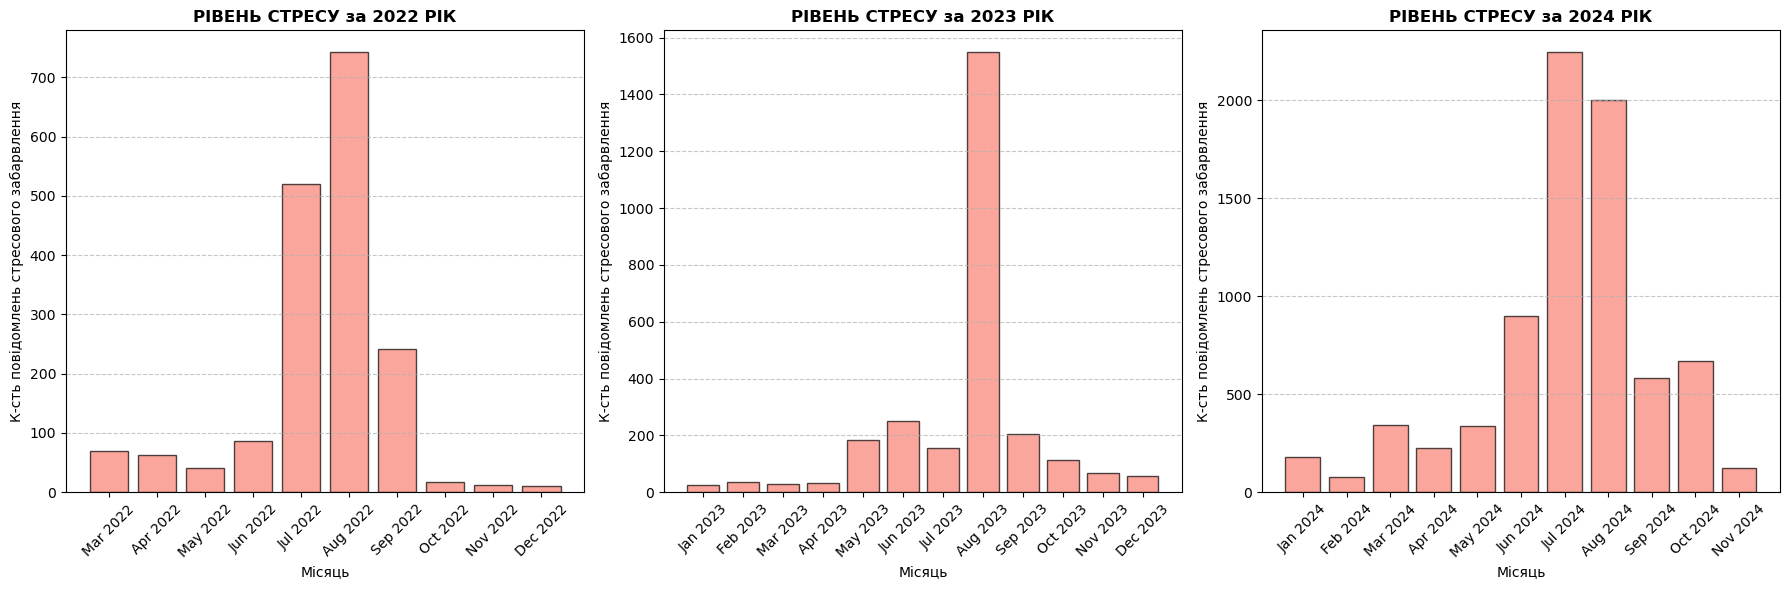

In [1580]:
years = [2022, 2023, 2024]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, year in zip(axs, years):
    year_data = monthly_stress_df[monthly_stress_df['Month'].dt.year == year]
    ax.bar(year_data['Month'].astype(str), year_data['StressCount'], color='salmon', edgecolor='black', alpha=0.7)
    ax.set_title(f'–†–Ü–í–ï–ù–¨ –°–¢–†–ï–°–£ –∑–∞ {year} –†–Ü–ö', fontweight='bold')
    ax.set_xlabel('–ú—ñ—Å—è—Ü—å')
    ax.set_ylabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —Å—Ç—Ä–µ—Å–æ–≤–æ–≥–æ –∑–∞–±–∞—Ä–≤–ª–µ–Ω–Ω—è')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(year_data['Month'])))
    ax.set_xticklabels(year_data['Month'].dt.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –õ–∏–ø–µ–Ω—å —ñ —Å–µ—Ä–ø–µ–Ω—å –≤–∏–∑–Ω–∞—á–∞—é—Ç—å—Å—è —è–∫ –Ω–∞–π–±—ñ–ª—å—à —Å—Ç—Ä–µ—Å–æ–≤—ñ –º—ñ—Å—è—Ü—ñ –¥–ª—è –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º –≤—Å—Ç—É–ø–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î—Ç—å—Å—è —ó—Ö –ø—Ä–∏—Å—É—Ç–Ω—ñ—Å—Ç—é —É —Ç—Ä—å–æ—Ö –ø—ñ–¥–≥—Ä–∞—Ñ—ñ–∫–∞—Ö. –¶–µ –¥–æ–∑–≤–æ–ª—è—î –∑—Ä–æ–±–∏—Ç–∏ –≤–∏—Å–Ω–æ–≤–æ–∫, —â–æ —É —Ç—Ä–∞–≤–Ω—ñ-—á–µ—Ä–≤–Ω—ñ (–ø–µ—Ä—ñ–æ–¥ –Ω–∞–ø–∏—Å–∞–Ω–Ω—è —ñ—Å–ø–∏—Ç—ñ–≤) –≤—Å—Ç—É–ø–Ω–∏–∫–∏ –ø–µ—Ä–µ–∂–∏–≤–∞—é—Ç—å –Ω–µ–≥–∞—Ç–∏–≤–Ω—ñ –µ–º–æ—Ü—ñ—ó, –∑–æ–∫—Ä–µ–º–∞ –≥–Ω—ñ–≤, —â–æ —î –ø—Ä–∏—Ä–æ–¥–Ω–æ—é —Ä–µ–∞–∫—Ü—ñ—î—é –∑ –ø—Å–∏—Ö–æ–ª–æ–≥—ñ—á–Ω–æ—ó —Ç–æ—á–∫–∏ –∑–æ—Ä—É (–ø.9). –£ —Ç–æ–π —á–∞—Å —è–∫ –ª–∏–ø–µ–Ω—å-—Å–µ—Ä–ø–µ–Ω—å (–ø–µ—Ä—ñ–æ–¥ –ø–æ–¥–∞–Ω–Ω—è –∑–∞—è–≤ –¥–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤) —Å—É–ø—Ä–æ–≤–æ–¥–∂—É—î—Ç—å—Å—è –≤–∏—Å–Ω–∞–∂–µ–Ω–Ω—è–º —Ç–∞ –ø–µ—Ä–µ–∂–∏–≤–∞–Ω–Ω—è–º–∏.

## 11. –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à—ñ –µ–º–æ–¥–∑—ñ —É —á–∞—Ç—ñ

In [1214]:
excluded_emojis = {'üéà'} #–í–∏—è–≤–∏–≤—Å—è –Ω—ñ–∫–æ–º –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á–∞ 

In [1215]:
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

In [1216]:
all_data = []

for file in os.listdir(DIALOGS_DATA_PATH):
    if file.endswith('.csv'):
        file_path = os.path.join(DIALOGS_DATA_PATH, file)
        df = pd.read_csv(file_path)
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.to_period('M')  
        df['emojis'] = df['message'].apply(lambda x: [e for e in extract_emojis(str(x)) if e not in excluded_emojis]) 
        all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

In [1217]:
combined_df_2024 = combined_df[combined_df['year'] == 2024]

emojis_by_month_2024 = combined_df_2024.groupby('month')['emojis'].apply(lambda x: [emo for sublist in x for emo in sublist])

most_common_by_month_2024 = emojis_by_month_2024.apply(lambda ems: Counter(ems).most_common(1))

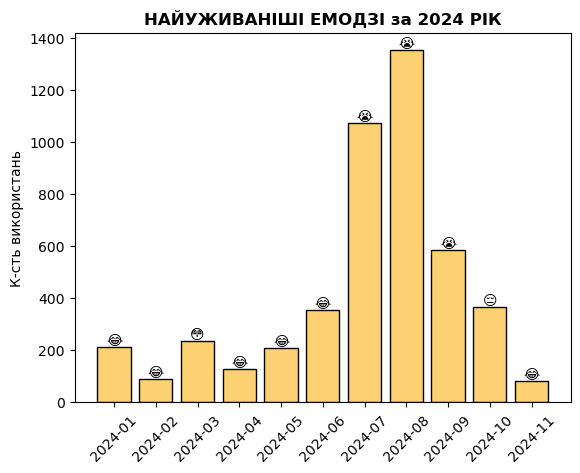

In [1582]:
emoji_df_2024 = pd.DataFrame([(month, data[0][0], data[0][1]) for month, data in most_common_by_month_2024.items()],
                             columns=['Month', 'Emoji', 'Count'])

plt.bar(emoji_df_2024['Month'].astype(str), emoji_df_2024['Count'], color='#fdd072', edgecolor='black')
for i, row in emoji_df_2024.iterrows():
    plt.text(i, row['Count'] + 10, row['Emoji'], ha='center')  
    
plt.title('–ù–ê–ô–£–ñ–ò–í–ê–ù–Ü–®–Ü –ï–ú–û–î–ó–Ü –∑–∞ 2024 –†–Ü–ö', fontweight='bold')
plt.ylabel('–ö-—Ç—å –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω—å')
plt.xticks(rotation=45)
plt.show()

In [1219]:
print("–ù–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à—ñ –µ–º–æ–¥–∑—ñ –ø–æ –º—ñ—Å—è—Ü—è—Ö –∑–∞ 2024 —Ä—ñ–∫:")
for month, data in most_common_by_month_2024.items():
    emoji, count = data[0]  
    print(f"–ú—ñ—Å—è—Ü—å: {month}, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: {emoji}")

–ù–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à—ñ –µ–º–æ–¥–∑—ñ –ø–æ –º—ñ—Å—è—Ü—è—Ö –∑–∞ 2024 —Ä—ñ–∫:
–ú—ñ—Å—è—Ü—å: 2024-01, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ
–ú—ñ—Å—è—Ü—å: 2024-02, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ
–ú—ñ—Å—è—Ü—å: 2024-03, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üò≥
–ú—ñ—Å—è—Ü—å: 2024-04, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ
–ú—ñ—Å—è—Ü—å: 2024-05, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ
–ú—ñ—Å—è—Ü—å: 2024-06, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ
–ú—ñ—Å—è—Ü—å: 2024-07, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üò≠
–ú—ñ—Å—è—Ü—å: 2024-08, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üò≠
–ú—ñ—Å—è—Ü—å: 2024-09, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üò≠
–ú—ñ—Å—è—Ü—å: 2024-10, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòî
–ú—ñ—Å—è—Ü—å: 2024-11, –ù–∞–π—É–∂–∏–≤–∞–Ω—ñ—à–∏–π –µ–º–æ–¥–∑—ñ: üòÇ


**–í–ò–°–ù–û–í–û–ö:** –ù–∞–π–≤–∏—Ä–∞–∑–Ω—ñ—à–∏–º–∏ –µ–º–æ–¥–∑—ñ, —â–æ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—é—Ç—å –µ–º–æ—Ü—ñ–π–Ω–∏–π —Å—Ç–∞–Ω –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤, —î "üò≥" —Ç–∞ "üò≠", —è–∫—ñ –ø–µ—Ä–µ–≤–∞–∂–∞—é—Ç—å —É –±–µ—Ä–µ–∑–Ω—ñ —Ç–∞ —Å–µ—Ä–ø–Ω—ñ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ. –ú–æ–∂–Ω–∞ –ø—Ä–æ–≤–µ—Å—Ç–∏ –∫–æ—Ä–µ–ª—è—Ü—ñ—é –º—ñ–∂ —Ü–∏–º–∏ –µ–º–æ–¥–∑—ñ —Ç–∞ –ø–æ–¥—ñ—è–º–∏, —â–æ –≤—ñ–¥–±—É–≤–∞—é—Ç—å—Å—è –≤ —Ü—ñ –º—ñ—Å—è—Ü—ñ: —É –±–µ—Ä–µ–∑–Ω—ñ, –∫–æ–ª–∏ –ú–û–ù –ø—É–±–ª—ñ–∫—É—î —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—é –ø—Ä–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—è —ñ—Å–ø–∏—Ç—ñ–≤ —Ç–∞ –≤–ø—Ä–æ–≤–∞–¥–∂—É—î –Ω–æ–≤—ñ –æ—Å–≤—ñ—Ç–Ω—ñ –∑–∞–∫–æ–Ω–∏, —á–∞—Å—Ç–æ –∑‚Äô—è–≤–ª—è—î—Ç—å—Å—è –µ–º–æ–¥–∑—ñ, —â–æ –≤–∏—Ä–∞–∂–∞—î –∑–¥–∏–≤—É–≤–∞–Ω–Ω—è ("üò≥"). –í —Å–µ—Ä–ø–Ω—ñ, –∫–æ–ª–∏ –≤—Å—Ç—É–ø–Ω–∞ –∫–∞–º–ø–∞–Ω—ñ—è –¥–æ—Å—è–≥–∞—î —Å–≤–æ–≥–æ –ø—ñ–∫—É —ñ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏ –ø–µ—Ä–µ–∂–∏–≤–∞—é—Ç—å –∑–Ω–∞—á–Ω–∏–π —Å—Ç—Ä–µ—Å, –ø–µ—Ä–µ–≤–∞–∂–∞—î –µ–º–æ–¥–∑—ñ, —â–æ –≤–∏—Ä–∞–∂–∞—î —Å–º—É—Ç–æ–∫ ("üò≠").

# **–ü–†–û–¶–ï–° –í–°–¢–£–ü–£**

## 12. –ü–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç–µ–π 12 –≥–∞–ª—É–∑—ñ

–°–µ—Ä–µ–¥ –Ω–∞–π–ø–æ—à–∏—Ä–µ–Ω—ñ—à–∏—Ö –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –≤ —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –∑—É—Å—Ç—Ä—ñ—á–∞–ª–∏—Å—è –Ω–æ–º–µ—Ä–∏ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç–µ–π, –∑–æ–∫—Ä–µ–º–∞ 121 —Ç–∞ 122. –û—Å–∫—ñ–ª—å–∫–∏ —Ü—ñ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ —î –ø–æ–ø—É–ª—è—Ä–Ω–∏–º–∏ —Å–µ—Ä–µ–¥ –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤ —Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–∏–º–∏ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç—ñ —Å—É—á–∞—Å–Ω–∏—Ö –≤–∏–º–æ–≥ –Ω–∞ —Ä–∏–Ω–∫—É –ø—Ä–∞—Ü—ñ, –±—É–ª–æ –≤–∏—Ä—ñ—à–µ–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª—ñ–∑ –ø–æ–ø–∏—Ç—É –Ω–∞ –∫–æ–∂–Ω—É IT-—Å–ø–µ—Ü—ñ–∞–ª—å–Ω—ñ—Å—Ç—å. –¶–µ –¥–æ–∑–≤–æ–ª–∏—Ç—å –≤–∏–∑–Ω–∞—á–∏—Ç–∏, —è–∫–∏—Ö —Ñ–∞—Ö—ñ–≤—Ü—ñ–≤ –≤ –£–∫—Ä–∞—ó–Ω—ñ –±—É–¥–µ –±—ñ–ª—å—à–µ, –∞ —è–∫–∏—Ö ‚Äî –º–µ–Ω—à–µ, —â–æ, —É —Å–≤–æ—é —á–µ—Ä–≥—É, –¥–∞—Å—Ç—å –∑–º–æ–≥—É –∫–æ—Ä–∏–≥—É–≤–∞—Ç–∏ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –º—ñ—Å—Ü—å –Ω–∞ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–∏—Ö —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—è—Ö, –∑–º–µ–Ω—à—É—é—á–∏ —ó—Ö —É —Ç–∏—Ö —Å—Ñ–µ—Ä–∞—Ö, –¥–µ –ø–æ–ø–∏—Ç –º–µ–Ω—à–∏–π, —ñ –∑–±—ñ–ª—å—à—É—é—á–∏ —É —Ç–∏—Ö, –¥–µ –æ—á—ñ–∫—É—î—Ç—å—Å—è –≤–∏—Å–æ–∫–∏–π –ø–æ–ø–∏—Ç –Ω–∞ —Ñ–∞—Ö—ñ–≤—Ü—ñ–≤.

In [1224]:
search_itphrases = ["121", "122", "123", "124", "125", "126"]
search_itphrases = [phrase.lower() for phrase in search_itphrases]

itword_counts = {phrase: 0 for phrase in search_itphrases}

In [1225]:
for message in df['message']:
    if isinstance(message, str): 
        for phrase in search_itphrases:
            if phrase in message:
                itword_counts[phrase] += 1

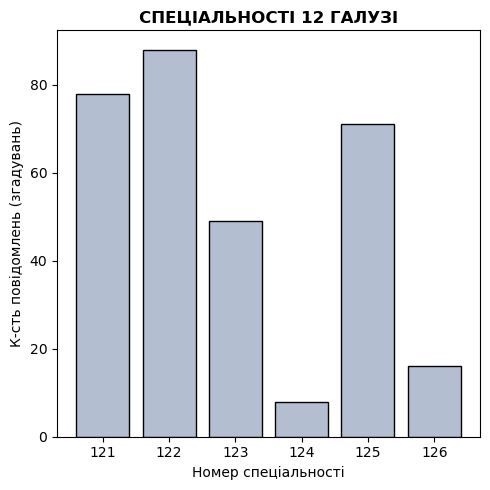

In [1586]:
plt.figure(figsize=(5, 5))
plt.bar(itword_counts.keys(), itword_counts.values(), color='#b3bfd1',edgecolor='black')

plt.title('–°–ü–ï–¶–Ü–ê–õ–¨–ù–û–°–¢–Ü 12 –ì–ê–õ–£–ó–Ü',fontweight='bold')
plt.xlabel('–ù–æ–º–µ—Ä —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ')
plt.ylabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å (–∑–≥–∞–¥—É–≤–∞–Ω—å)')
plt.tight_layout()

plt.show()

**–í–ò–°–ù–û–í–û–ö:** –î–æ —Ç—Ä—ñ–π–∫–∏ –Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à–∏—Ö —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç–µ–π —É –≥–∞–ª—É–∑—ñ 12 (–Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ–π–Ω—ñ —Ç–µ—Ö–Ω–æ–ª–æ–≥—ñ—ó) –≤—Ö–æ–¥—è—Ç—å 122 "–ö–æ–º–ø'—é—Ç–µ—Ä–Ω—ñ –Ω–∞—É–∫–∏", 121 "–Ü–Ω–∂–µ–Ω–µ—Ä—ñ—è –ø—Ä–æ–≥—Ä–∞–º–Ω–æ–≥–æ –∑–∞–±–µ–∑–ø–µ—á–µ–Ω–Ω—è" —Ç–∞ 125 "–ö—ñ–±–µ—Ä–±–µ–∑–ø–µ–∫–∞". –í–∞—Ä—Ç–æ –∑–∞–∑–Ω–∞—á–∏—Ç–∏, —â–æ –≤ –ù–∞–£–ö–ú–ê –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç—ñ —ñ–Ω—Ñ–æ—Ä–º–∞—Ç–∏–∫–∏ –ø—Ä–æ–ø–æ–Ω—É—é—Ç—å —Å–∞–º–µ —Ü—ñ —Ç—Ä–∏ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —ó—Ö –≤–∏—Å–æ–∫—É –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å —Å–µ—Ä–µ–¥ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤. –¶–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ —Ç–µ, —â–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç –∞–¥–∞–ø—Ç—É—î—Ç—å—Å—è –¥–æ –ø–æ–ø–∏—Ç—É –Ω–∞ —Ü—ñ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ. –í–æ–¥–Ω–æ—á–∞—Å, —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ 126 "–Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ–π–Ω—ñ —Å–∏—Å—Ç–µ–º–∏ —Ç–∞ —Ç–µ—Ö–Ω–æ–ª–æ–≥—ñ—ó" —Ç–∞ 124 "–°–∏—Å—Ç–µ–º–Ω–∏–π –∞–Ω–∞–ª—ñ–∑" –Ω–µ –Ω–∞–±—Ä–∞–ª–∏ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—ñ –≤ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è—Ö —Å–µ—Ä–µ–¥ –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î—Ç—å—Å—è –Ω–∏–∑—å–∫–∏–º —Ä—ñ–≤–Ω–µ–º —ó—Ö –∑–≥–∞–¥—É–≤–∞–Ω–æ—Å—Ç—ñ –≤ —á–∞—Ç–∞—Ö.

## 13. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∑–∞—è–≤ –¥–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ / –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è –≤ —á–∞—Ç–∞—Ö

In [1423]:
search_uni_phrases = {}

In [1425]:
with open(universities_PATH, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if ':' in line.strip():
            key, phrases = line.strip().split(':', 1) 
            phrases_list = [phrase.strip() for phrase in phrases.split(',')]
            search_uni_phrases[key.strip()] = phrases_list  

In [1475]:
real_applications = {
    '–õ–ü': 45992/100,
    '–ö–ù–£': 44182/100,
    '–õ–ù–£': 44138/100,
    '–ö–ü–Ü': 35475/100,
    '–î–¢–ï–£': 27122/100,
    '–ö–ù–ï–£': 18884/100,
    '–ß–ù–£': 18706/100,
    '–ù–ê–£': 17990/100,
    '–ü–ù–£': 17670/100,
    '–ù–£–ë–Ü–ü': 17180/100
}

In [1477]:
word_counts = {group: 0 for group in search_uni_phrases}

In [1479]:
word_counts = {group: 0 for group in search_uni_phrases}
for group, phrases in search_uni_phrases.items():
    for phrase in phrases:
        word_counts[group] += all_text.count(phrase.lower())


sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

final_counts = {}
for group, count in sorted_word_counts.items():
    final_counts[group] = {
        'Count': count,
        'Real Applications': real_applications.get(group, 0)
    }

sorted_final_counts = dict(sorted(final_counts.items(), key=lambda item: item[1]['Count'], reverse=True))

In [1480]:
university_names = list(sorted_final_counts.keys())
counts = [data['Count'] for data in sorted_final_counts.values()]
real_applications_counts = [data['Real Applications'] for data in sorted_final_counts.values()]

num_universities = len(university_names)

ind = np.arange(num_universities)
width = 0.35  

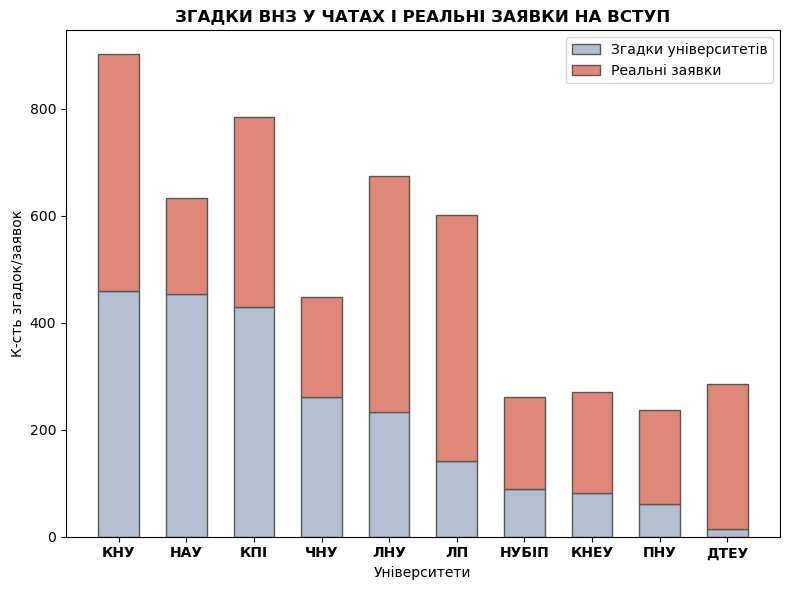

In [1495]:
fig, ax = plt.subplots(figsize=(8, 6))

ind = range(len(university_names))  
width = 0.6  

bars1 = ax.bar(ind, counts, width, label='–ó–≥–∞–¥–∫–∏ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤', color='#b3bfd1', edgecolor='#545955')
bars2 = ax.bar(ind, real_applications_counts, width, bottom=counts, label='–†–µ–∞–ª—å–Ω—ñ –∑–∞—è–≤–∫–∏', color= "#df8879", edgecolor='#545955')

ax.set_xlabel('–£–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç–∏')
ax.set_ylabel('–ö-—Ç—å –∑–≥–∞–¥–æ–∫/–∑–∞—è–≤–æ–∫')
ax.set_title('–ó–ì–ê–î–ö–ò –í–ù–ó –£ –ß–ê–¢–ê–• –Ü –†–ï–ê–õ–¨–ù–Ü –ó–ê–Ø–í–ö–ò –ù–ê –í–°–¢–£–ü', fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(university_names, fontweight='bold')

# –î–æ–¥–∞–≤–∞–Ω–Ω—è –ª–µ–≥–µ–Ω–¥–∏
ax.legend()

# –í–∏–≤–µ–¥–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫–∞
plt.tight_layout()
plt.show()

> –ü–æ—è—Å–Ω–µ–Ω–Ω—è –¥–æ –≥—Ä–∞—Ñ—ñ–∫—É: —Å–ø—Ä–∞–≤–∂–Ω—é –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞—è–≤ –º–æ–∂–Ω–∞ –≤–∏–∑–Ω–∞—á–∏—Ç–∏, –ø–æ–º–Ω–æ–∂–∏–≤—à–∏ –∑–Ω–∞—á–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫–∞ –Ω–∞ –æ—Å—ñ —É –Ω–∞ 100. –ó–∞–¥–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ —ñ –±—ñ–ª—å—à–æ—ó –Ω–∞–æ—á–Ω–æ—Å—Ç—ñ –±—É–ª–æ –≤–∏—Ä—ñ—à–µ–Ω–æ —Ä–æ–∑–¥—ñ–ª–∏—Ç–∏ —Å–ø—Ä–∞–≤–∂–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞ 100, –∞–¥–∂–µ –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å –≤ —á–∞—Ç–∞—Ö –ø—Ä–æ —Ü—ñ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç–∏ –≤ —Å—Ç—ñ–ª—å–∫–∏ —Ä–∞–∑—ñ–≤ –º–µ–Ω—à–µ. –£—Å—ñ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç–∏, —â–æ –Ω–∞–≤–µ–¥–µ–Ω—ñ –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É –≤—Ö–æ–¥—è—Ç—å –≤ —Ç–æ–ø-10 —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ –∑–∞ –∑–∞—è–≤–∫–∞–º–∏ —É 2024 —Ä–æ—Ü—ñ (–∑–∞ –¥–∞–Ω–∏–º–∏ abit-poisk.org.ua).

**–í–ò–°–ù–û–í–û–ö:** –¢—Ä—ñ–π–∫–∞ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ –∑–∞ –∑–≥–∞–¥–∫–∞–º–∏ –≤ —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –≤–∫–ª—é—á–∞—î: –ö–ù–£ (–ö–∏—ó–≤—Å—å–∫–∏–π –Ω–∞—Ü—ñ–æ–Ω–∞–ª—å–Ω–∏–π —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç —ñ–º–µ–Ω—ñ –¢–∞—Ä–∞—Å–∞ –®–µ–≤—á–µ–Ω–∫–∞), –ù–ê–£ (–ù–∞—Ü—ñ–æ–Ω–∞–ª—å–Ω–∏–π –∞–≤—ñ–∞—Ü—ñ–π–Ω–∏–π —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç) —Ç–∞ –ö–ü–Ü (–ö–∏—ó–≤—Å—å–∫–∏–π –ø–æ–ª—ñ—Ç–µ—Ö–Ω—ñ—á–Ω–∏–π —ñ–Ω—Å—Ç–∏—Ç—É—Ç —ñ–º–µ–Ω—ñ –Ü–≥–æ—Ä—è –°—ñ–∫–æ—Ä—Å—å–∫–æ–≥–æ). –ù–∞—Ç–æ–º—ñ—Å—Ç—å –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —Ä–µ–∞–ª—å–Ω–∏—Ö –∑–∞—è–≤ –ª—ñ–¥–∏—Ä—É—é—Ç—å –õ–ü (–õ—å–≤—ñ–≤—Å—å–∫–∞ –ø–æ–ª—ñ—Ç–µ—Ö–Ω—ñ–∫–∞), –ö–ù–£ —Ç–∞ –õ–ù–£ (–õ—å–≤—ñ–≤—Å—å–∫–∏–π –Ω–∞—Ü—ñ–æ–Ω–∞–ª—å–Ω–∏–π —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç —ñ–º–µ–Ω—ñ –Ü–≤–∞–Ω–∞ –§—Ä–∞–Ω–∫–∞). –¢–∞–∫–∏–º —á–∏–Ω–æ–º, –ª–∏—à–µ –æ–¥–∏–Ω —ñ–∑ —Ç—Ä—å–æ—Ö —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ ‚Äî –ö–ù–£ ‚Äî —î —Å–ø—ñ–ª—å–Ω–∏–º –ª—ñ–¥–µ—Ä–æ–º —è–∫ –∑–∞ –∑–≥–∞–¥–∫–∞–º–∏, —Ç–∞–∫ —ñ –∑–∞ —Ä–µ–∞–ª—å–Ω–∏–º–∏ –∑–∞—è–≤–∫–∞–º–∏, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î –π–æ–≥–æ —Å—Ç–∞—Ç—É—Å –æ–¥–Ω–æ–≥–æ –∑ –ø—Ä–æ–≤—ñ–¥–Ω–∏—Ö —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ –£–∫—Ä–∞—ó–Ω–∏. 

–ó–≥–∞–¥–∫–∏ –ø—Ä–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç–∏ —Å–≤—ñ–¥—á–∞—Ç—å –ø—Ä–æ –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å –∫–∏—ó–≤—Å—å–∫–∏—Ö –≤–∏—à—ñ–≤ —Å–µ—Ä–µ–¥ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤, –∞–¥–∂–µ —Å–∞–º–µ –ö–ù–£, –ù–ê–£ —Ç–∞ –ö–ü–Ü –∞–∫—Ç–∏–≤–Ω–æ –æ–±–≥–æ–≤–æ—Ä—é—é—Ç—å—Å—è –≤ —á–∞—Ç–∞—Ö. –¶–µ –∫–æ—Ä–µ–ª—é—î –∑ —Ç–µ–Ω–¥–µ–Ω—Ü—ñ—î—é –≤–∏—Å–æ–∫–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –∑–∞—è–≤ –Ω–∞ –Ω–∞–≤—á–∞–Ω–Ω—è –¥–æ —É–Ω—ñ–≤–µ—Ä—Å–∏—Ç–µ—Ç—ñ–≤ —É —Å—Ç–æ–ª–∏—Ü—ñ.

## 14. –¢–û–ü-10 —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç–µ–π —É —á–∞—Ç–∞—Ö

In [1239]:
with open(spec_PATH, 'r', encoding='utf-8') as f:
    specialties = [line.strip().lower() for line in f.readlines()]  
mention_counts = Counter()

In [1240]:
if 'message' in df.columns:
    for message in df['message'].dropna():
        for specialty in specialties:
            if specialty.lower() in message.lower():  
                mention_counts[specialty] += 1

In [1241]:
top_10_specialties = mention_counts.most_common(10)

top_10_specialties.sort(key=lambda x: x[1], reverse=True)

specialty_names = [item[0] for item in top_10_specialties]
mention_counts_values = [item[1] for item in top_10_specialties]

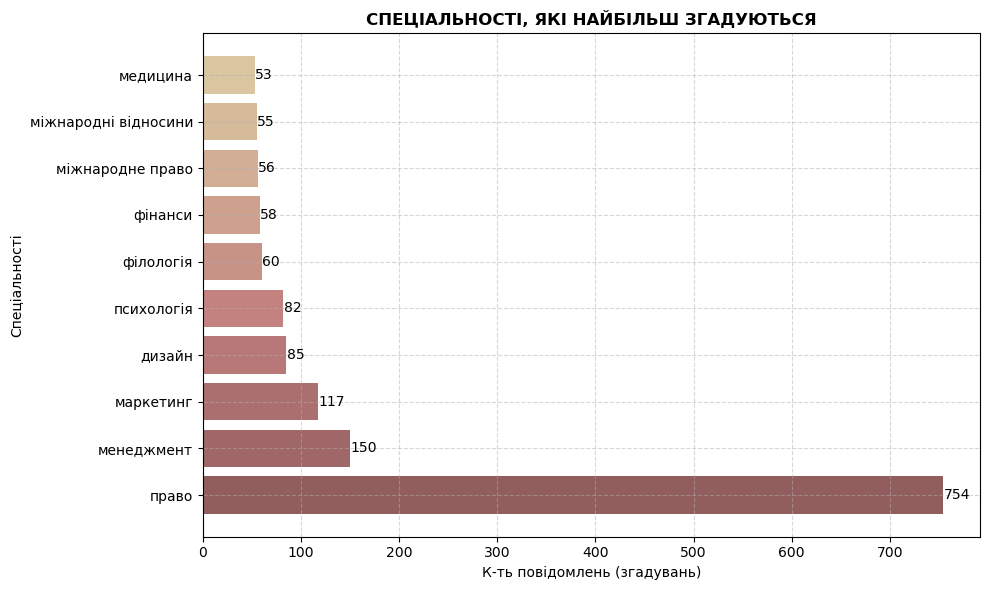

In [1598]:
colors = plt.cm.pink(np.linspace(0.2, 0.6, len(specialty_names)))  

plt.figure(figsize=(10, 6))

plt.barh(specialty_names, mention_counts_values, color=colors)

plt.title('–°–ü–ï–¶–Ü–ê–õ–¨–ù–û–°–¢–Ü, –Ø–ö–Ü –ù–ê–ô–ë–Ü–õ–¨–® –ó–ì–ê–î–£–Æ–¢–¨–°–Ø', fontweight='bold')
plt.xlabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å (–∑–≥–∞–¥—É–≤–∞–Ω—å)')
plt.ylabel('–°–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ')
plt.grid(True, linestyle='--', alpha=0.5)

for i, count in enumerate(mention_counts_values):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ü—Ä–∞–≤–æ, –º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç —ñ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ ‚Äî —Ü–µ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ, —è–∫–∏–º –Ω–∞–¥–∞—é—Ç—å –ø–µ—Ä–µ–≤–∞–≥—É –≤—Å—Ç—É–ø–Ω–∏–∫–∏, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î—Ç—å—Å—è —á–∞—Å—Ç–∏–º–∏ –∑–≥–∞–¥–∫–∞–º–∏ –≤ —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤. –Ü–Ω—à—ñ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç—ñ, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ñ –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É, —Ç–∞–∫–æ–∂ –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å –∑–Ω–∞—á–Ω–∏–π —ñ–Ω—Ç–µ—Ä–µ—Å —Å–µ—Ä–µ–¥ –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤ —ñ —î –ø–æ–ø—É–ª—è—Ä–Ω–∏–º –≤–∏–±–æ—Ä–æ–º –¥–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è –Ω–∞ –±–∞–∫–∞–ª–∞–≤—Ä–∞—Ç—ñ.

–¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–∏—Å–æ–∫—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é –º—ñ–∂ –∞–∫—Ç–∏–≤–Ω—ñ—Å—Ç—é –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —É —á–∞—Ç–∞—Ö —Ç–∞ —Ä–µ–∞–ª—å–Ω–∏–º–∏ —Ä–µ–π—Ç–∏–Ω–≥–∞–º–∏ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—ñ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω–æ—Å—Ç–µ–π. –ó–≥–∞–¥–∫–∏ –≤ —á–∞—Ç–∞—Ö –º–æ–∂–Ω–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ —è–∫ –¥–æ–¥–∞—Ç–∫–æ–≤–µ –¥–∂–µ—Ä–µ–ª–æ –¥–∞–Ω–∏—Ö –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É —Ç–µ–Ω–¥–µ–Ω—Ü—ñ–π —ñ —É–ø–æ–¥–æ–±–∞–Ω—å –≤—Å—Ç—É–ø–Ω–∏–∫—ñ–≤, —â–æ –¥–∞—î –∑–º–æ–≥—É —Ç–æ—á–Ω—ñ—à–µ –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞—Ç–∏ –ø–æ–ø–∏—Ç –Ω–∞ –ø–µ–≤–Ω—ñ –Ω–∞–ø—Ä—è–º–∏.

## **–¢–ï–ú–ò –û–ë–ì–û–í–û–†–ï–ù–ù–Ø**

## 15. –ü–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å —Ç–µ–º –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è 

In [1612]:
search_phrases = {}

In [1614]:
with open(categ_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if ':' in line.strip():
            key, phrases = line.strip().split(':', 1) 
            phrases_list = [phrase.strip() for phrase in phrases.split(',')]
            search_phrases[key.strip()] = phrases_list
        else:
            print(f"–ü—Ä–æ–ø—É—â–µ–Ω–æ —Ä—è–¥–æ–∫: {line.strip()}")  

word_counts = {group: 0 for group in search_phrases}

–ü—Ä–æ–ø—É—â–µ–Ω–æ —Ä—è–¥–æ–∫: 
–ü—Ä–æ–ø—É—â–µ–Ω–æ —Ä—è–¥–æ–∫: 
–ü—Ä–æ–ø—É—â–µ–Ω–æ —Ä—è–¥–æ–∫: 
–ü—Ä–æ–ø—É—â–µ–Ω–æ —Ä—è–¥–æ–∫: 


In [1616]:
for group, phrases in search_phrases.items():
    for phrase in phrases:
        word_counts[group] += all_text.count(phrase.lower())

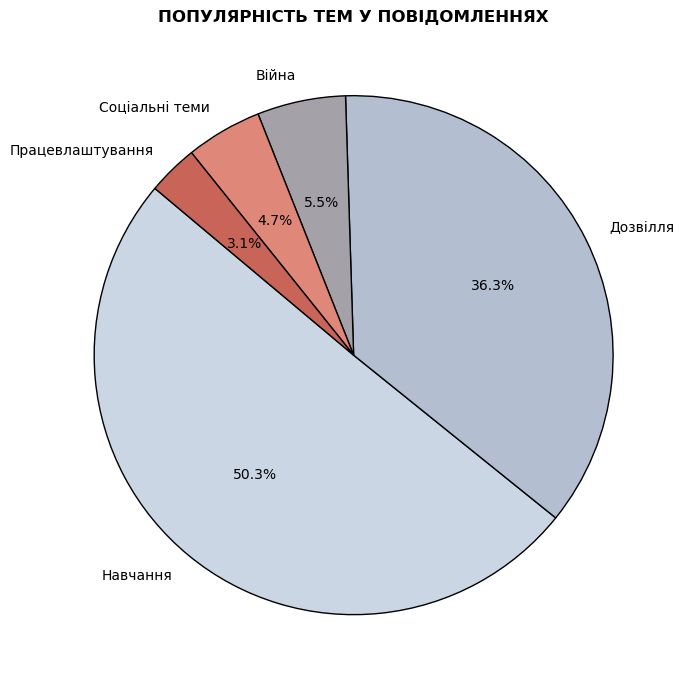

In [1627]:
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

labels = list(sorted_word_counts.keys())
sizes = list(sorted_word_counts.values())

plt.figure(figsize=(7, 7))
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors = ["#cbd6e4", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558"], 
        wedgeprops={'edgecolor': 'black'})

plt.title('–ü–û–ü–£–õ–Ø–†–ù–Ü–°–¢–¨ –¢–ï–ú –£ –ü–û–í–Ü–î–û–ú–õ–ï–ù–ù–Ø–•',fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ê–Ω–∞–ª—ñ–∑ –ø–æ–∫–∞–∑–∞–≤, —â–æ 50% –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —Å—Ç–æ—Å—É—é—Ç—å—Å—è —Ç–µ–º –Ω–∞–≤—á–∞–Ω–Ω—è —Ç–∞ –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–æ —ñ—Å–ø–∏—Ç—ñ–≤. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ —Ç–∞–∫—ñ —á–∞—Ç–∏ –¥—ñ–π—Å–Ω–æ –≤–∏–∫–æ–Ω—É—é—Ç—å —Å–≤–æ—é –æ—Å–Ω–æ–≤–Ω—É —Ñ—É–Ω–∫—Ü—ñ—é ‚Äì —Å–ª—É–≥—É—é—Ç—å –ø–ª–∞—Ç—Ñ–æ—Ä–º–æ—é –¥–ª—è –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è –æ—Å–≤—ñ—Ç–Ω—ñ—Ö –ø–∏—Ç–∞–Ω—å.

–¶–µ–π –ø–æ–∫–∞–∑–Ω–∏–∫ —î –¥—É–∂–µ –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–º, –∞–¥–∂–µ –≤—ñ–Ω –¥–µ–º–æ–Ω—Å—Ç—Ä—É—î, —â–æ –≤ —Ü–∏—Ö —á–∞—Ç–∞—Ö –ø–µ—Ä–µ–≤–∞–∂–∞—î —Ü—ñ–ª—å–æ–≤–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç, –∞ –Ω–µ –ª–∏—à–µ —Å–ø–∞–º —á–∏ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è —Å—Ç–æ—Ä–æ–Ω–Ω—ñ—Ö —Ç–µ–º. –ê–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏ –∞–∫—Ç–∏–≤–Ω–æ –¥—ñ–ª—è—Ç—å—Å—è —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—î—é, –∑–∞–¥–∞—é—Ç—å –ø–∏—Ç–∞–Ω–Ω—è —Ç–∞ –æ—Ç—Ä–∏–º—É—é—Ç—å –∫–æ—Ä–∏—Å–Ω—ñ –≤—ñ–¥–ø–æ–≤—ñ–¥—ñ, —â–æ —Å–ø—Ä–∏—è—î —ó—Ö–Ω—ñ–π –ø—ñ–¥–≥–æ—Ç–æ–≤—Ü—ñ –¥–æ –≤—Å—Ç—É–ø—É. –¢–∞–∫–∏–º —á–∏–Ω–æ–º, —á–∞—Ç–∏ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —Å—Ç–∞—é—Ç—å –≤–∞–∂–ª–∏–≤–∏–º —ñ–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º –ø—ñ–¥—Ç—Ä–∏–º–∫–∏ —Ç–∞ –≤–∑–∞—î–º–æ–¥–æ–ø–æ–º–æ–≥–∏ —Å–µ—Ä–µ–¥ —É—á–∞—Å–Ω–∏–∫—ñ–≤.

## 16. –¢–û–ü-10 –ø–æ—Å–∏–ª–∞–Ω—å 

In [1252]:
url_pattern = re.compile(r'https?://(?:www\.)?([\w.-]+)/?')

domain_counts = Counter()

In [1253]:
for message in df['message']:
    if pd.notnull(message):
        urls = url_pattern.findall(message)
        domain_counts.update(urls)

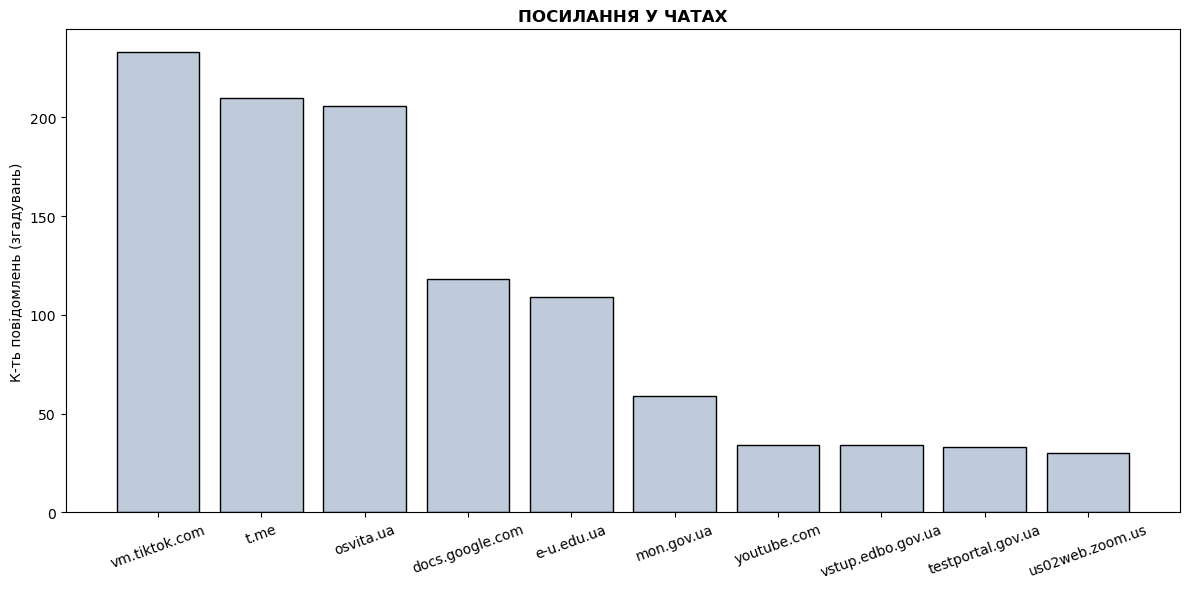

In [1643]:
top_domains = domain_counts.most_common(10)  
domains, counts = zip(*top_domains)

plt.figure(figsize=(12, 6))
plt.bar(domains, counts, color='#bfcbdb', edgecolor='black')

plt.title('–ü–û–°–ò–õ–ê–ù–ù–Ø –£ –ß–ê–¢–ê–•',fontweight='bold')
plt.ylabel('–ö-—Ç—å –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å (–∑–≥–∞–¥—É–≤–∞–Ω—å)')
plt.xticks(rotation=20)
plt.tight_layout()

plt.show()

 **–í–ò–°–ù–û–í–û–ö:** –ó–≥—ñ–¥–Ω–æ –∑ –¥—ñ–∞–≥—Ä–∞–º–æ—é, –Ω–∞–π–±—ñ–ª—å—à–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ—Å–∏–ª–∞–Ω—å —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –≤–µ–¥–µ –Ω–∞ TikTok, —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å —Ü—ñ—î—ó –ø–ª–∞—Ç—Ñ–æ—Ä–º–∏ —Å–µ—Ä–µ–¥ –º–æ–ª–æ–¥—ñ –Ω–∞–≤—ñ—Ç—å —É —á–∞—Å –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–æ —ñ—Å–ø–∏—Ç—ñ–≤. –í –∑–∞–≥–∞–ª—å–Ω–æ–º—É —Ü—ñ –ø–æ—Å–∏–ª–∞–Ω–Ω—è –º–æ–∂–Ω–∞ —Ä–æ–∑–¥—ñ–ª–∏—Ç–∏ –Ω–∞ —Ç–µ–º–∏, —è–∫—ñ –∑–≥–∞–¥—É–≤–∞–ª–∏—Å—è —É –ø.15: 
 - –ù–∞–≤—á–∞–Ω–Ω—è (osvita.ua, e-u.edu.ua, mon.gov.ua, vstup.edbo.gov.ua, testportal.gov.ua) - —Ç–æ–±—Ç–æ 50%, —â–æ –≤—ñ–¥–ø–æ–≤—ñ–¥–∞—î –∞–Ω–∞–ª—ñ–∑—É –ø—É–Ω–∫—Ç–æ–º –≤–∏—â–µ.
 - –î–æ–∑–≤—ñ–ª–ª—è —Ç–∞ —ñ–Ω—à–µ (vm.tiktok.com, t.me, docs.google.com, youtube.com, us02web.zoom.us).

## 17. –ö—Ä–∞—ó–Ω–∏, —â–æ –Ω–∞–π—á–∞—Å—Ç—ñ—à–µ –∑–≥–∞–¥—É—é—Ç—å—Å—è

–£ —Ü—å–æ–º—É –ø—É–Ω–∫—Ç—ñ –∞–Ω–∞–ª—ñ–∑—É—î—Ç—å—Å—è —á–∞—Å—Ç–æ—Ç–∞ –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è –∫—Ä–∞—ó–Ω –º—ñ–∂ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∞–º–∏, —â–æ –æ—Ö–æ–ø–ª—é—î —è–∫ –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω—ñ—Å—Ç—å –ø—ñ–¥–ª—ñ—Ç–∫—ñ–≤ –Ω–∞–≤—á–∞–Ω–Ω—è–º –∑–∞ –∫–æ—Ä–¥–æ–Ω–æ–º, —Ç–∞–∫ —ñ –æ–±–≥–æ–≤–æ—Ä–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω–∏—Ö —Ç–µ–º —É —Å–≤—ñ—Ç—ñ, —â–æ —Å—Ç–æ—Å—É—î—Ç—å—Å—è –º—ñ–∂–Ω–∞—Ä–æ–¥–Ω–∏—Ö –≤—ñ–¥–Ω–æ—Å–∏–Ω.

In [1645]:
countries = {
    "–°–®–ê": r"\b—Å—à–∞\b|\b–∞–º–µ—Ä–∏–∫(–∞|–∞–Ω—Å—å–∫–∏–π|–∞–Ω—Å—å–∫—ñ|–∞–Ω—Å—å–∫–∞|–∞–Ω—Ü—ñ–≤|–∞–Ω—Ü—ñ)\b",
    "–†–æ—Å—ñ—è": r"\b—Ä–æ—Å—ñ(—è|–π—Å—å–∫–∏–π|–π—Å—å–∫—ñ|–π—Å—å–∫–∞|—è–Ω|—è–Ω—Å—å–∫–∏–π)\b",
    "–ù—ñ–º–µ—á—á–∏–Ω–∞": r"\b–Ω—ñ–º–µ—á—á(–∏–Ω–∞|–∏–Ω–∏|–∏–Ω—Ü—ñ|–∞–Ω—Å—å–∫–∏–π|–∞–Ω—Å—å–∫–∞)\b",
    "–§—Ä–∞–Ω—Ü—ñ—è": r"\b—Ñ—Ä–∞–Ω—Ü(—ñ—è|—É–∑—å–∫–∏–π|—É–∑—å–∫–∞|—É–∑—å–∫—ñ|—É–∑—å—Ü—ñ–≤|—É–∑—å—Ü—ñ)\b",
    "–ü–æ–ª—å—â–∞": r"\b–ø–æ–ª—å—â(–∞|—ñ|—ñ)\b|\b–ø–æ–ª—è–∫(–∏|—ñ–≤|—Å—å–∫–∏–π|—Å—å–∫–∞)\b",
    "–ö–∏—Ç–∞–π": r"\b–∫–∏—Ç–∞(–π|–π—Å—å–∫–∏–π|–π—Å—å–∫—ñ|–π—Ü—ñ–≤|–π—Ü—ñ)\b",
    "–Ü—Ç–∞–ª—ñ—è": r"\b—ñ—Ç–∞–ª—ñ(—è|–π—Å—å–∫–∏–π|–π—Å—å–∫—ñ|–π—Å—å–∫–∞)\b",
    "–í–µ–ª–∏–∫–∞ –ë—Ä–∏—Ç–∞–Ω—ñ—è": r"\b(–≤–µ–ª–∏–∫(–∞|–æ—ó) –±—Ä–∏—Ç–∞–Ω(—ñ—è|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ|—Ü—ñ–≤)|–∞–Ω–≥–ª—ñ(—è|–π—Ü—ñ))\b",
    "–ö–∞–Ω–∞–¥–∞": r"\b–∫–∞–Ω–∞–¥(–∞|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ–≤|—Ü—ñ)\b",
    "–Ü—Å–ø–∞–Ω—ñ—è": r"\b—ñ—Å–ø–∞–Ω(—ñ—è|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ–≤|—Ü—ñ)\b",
    "–Ø–ø–æ–Ω—ñ—è": r"\b—è–ø–æ–Ω(—ñ—è|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ–≤|—Ü—ñ)\b",
    "–®–≤–µ—Ü—ñ—è": r"\b—à–≤–µ–¥(—ñ—è|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ|—Ü—ñ–≤)\b",
    "–®–≤–µ–π—Ü–∞—Ä—ñ—è": r"\b—à–≤–µ–π—Ü–∞—Ä(—ñ—è|—Å—å–∫–∏–π|—Å—å–∫—ñ|—Å—å–∫–∞|—Ü—ñ|—Ü—ñ–≤)\b",
    "–ë—ñ–ª–æ—Ä—É—Å—å": r"\b–±—ñ–ª–æ—Ä—É—Å(—å|—ñ|—å–∫–∏–π|—å–∫–∞|—å–∫—ñ|—å—Ü—ñ–≤|—å—Ü—ñ)\b",
    "–ü—ñ–≤–¥–µ–Ω–Ω–∞ –ö–æ—Ä–µ—è": r"\b–ø—ñ–≤–¥–µ–Ω–Ω(–∞|–æ—ó) –∫–æ—Ä–µ(—è|–π—Å—å–∫–∏–π|–π—Å—å–∫—ñ|–π—Å—å–∫–∞|–π—Ü—ñ–≤|–π—Ü—ñ)\b",
    "–§—ñ–Ω–ª—è–Ω–¥—ñ—è": r"\b—Ñ—ñ–Ω–ª—è–Ω–¥—ñ(—è|–π—Å—å–∫–∏–π|–π—Å—å–∫—ñ|–π—Å—å–∫–∞|–π—Ü—ñ–≤|–π—Ü—ñ)\b",
}

In [1647]:
country_mentions = Counter()

In [1649]:
for message in df['message']:
    if pd.notnull(message):
        for country, pattern in countries.items():
            if re.search(pattern, message):
                country_mentions[country] += 1

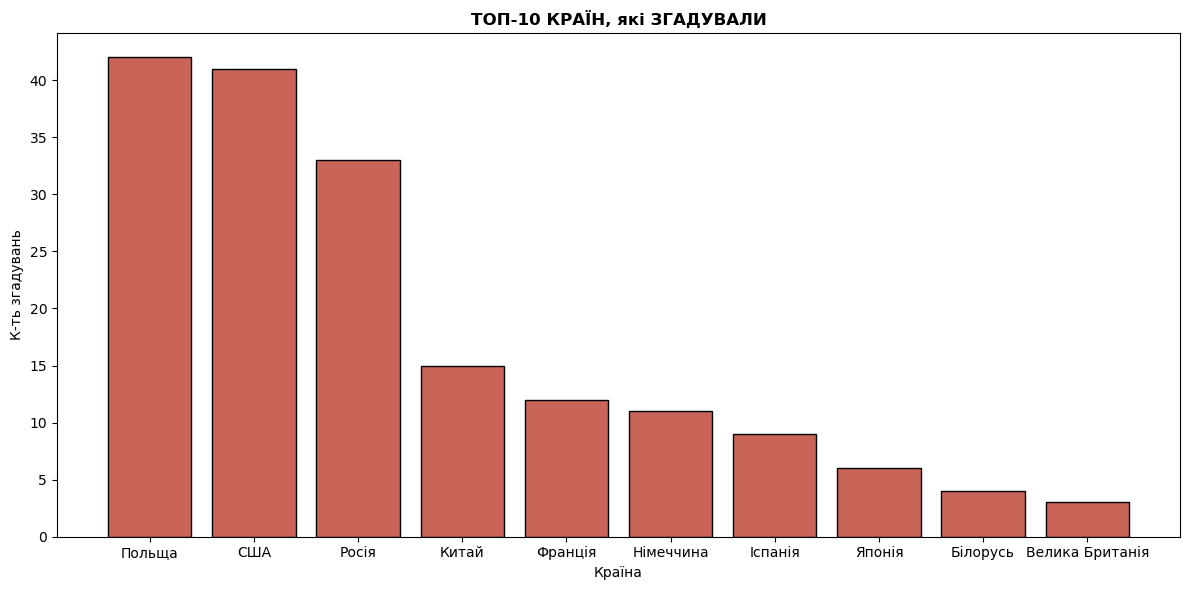

In [1657]:
top_countries = country_mentions.most_common(10)
country_names, counts = zip(*top_countries)

plt.figure(figsize=(12, 6))
plt.bar(country_names, counts, color='#c86558', edgecolor='black')

plt.title('–¢–û–ü-10 –ö–†–ê–á–ù, —è–∫—ñ –ó–ì–ê–î–£–í–ê–õ–ò', fontweight='bold')
plt.xlabel('–ö—Ä–∞—ó–Ω–∞')
plt.ylabel('–ö-—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å')
plt.xticks()
plt.tight_layout()

plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ü–æ–ª—å—â–∞, –°–®–ê —Ç–∞ –†–æ—Å—ñ—è –≤—Ö–æ–¥—è—Ç—å –¥–æ —Ç—Ä—ñ–π–∫–∏ –Ω–∞–π–±—ñ–ª—å—à –∑–≥–∞–¥—É–≤–∞–Ω–∏—Ö –∫—Ä–∞—ó–Ω —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω—ñ—Å—Ç—å –º–æ–ª–æ–¥—ñ –≤ –ø–æ–¥—ñ—è—Ö, —è–∫—ñ –≤—ñ–¥–±—É–≤–∞—é—Ç—å—Å—è —É —Å–≤—ñ—Ç—ñ (–ø. 15). –ö—Ä—ñ–º —Ç–æ–≥–æ, –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å –∫—Ä–∞—ó–Ω –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ –≤–∏–±—ñ—Ä –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ —â–æ–¥–æ –Ω–∞–≤—á–∞–Ω–Ω—è –∑–∞ –∫–æ—Ä–¥–æ–Ω–æ–º, –∑–æ–∫—Ä–µ–º–∞ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç—ñ –¥–æ—Å—Ç—É–ø–Ω–∏—Ö –æ—Å–≤—ñ—Ç–Ω—ñ—Ö –º–æ–∂–ª–∏–≤–æ—Å—Ç–µ–π —Ç–∞ –º—ñ–∂–Ω–∞—Ä–æ–¥–Ω–∏—Ö –∑–≤'—è–∑–∫—ñ–≤.

## 18. –î–∏–Ω–∞–º—ñ–∫–∞ –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è –∞–∫—Ç—É–∞–ª—å–Ω–∏—Ö —Ç–µ–º —É –∫—Ä–∞—ó–Ω—ñ

–ü–æ—Å–∏–ª–∞—é—á–∏—Å—å –Ω–∞ –ø. 15 —Ç–∞ –¥–æ–¥–∞—Ç–∫–æ–≤–∏–π –∞–Ω–∞–ª—ñ–∑ –ø–æ—à–∏—Ä–µ–Ω–∏—Ö —Å–ª—ñ–≤, –±—É–ª–æ –≤–∏—è–≤–ª–µ–Ω–æ, —â–æ –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏ —á–∞—Å—Ç–æ –æ–±–≥–æ–≤–æ—Ä—é—é—Ç—å –∞–∫—Ç—É–∞–ª—å–Ω—ñ –ø–æ–¥—ñ—ó –≤ –£–∫—Ä–∞—ó–Ω—ñ, –∑–æ–∫—Ä–µ–º–∞ —â–æ–¥–æ –≤—ñ–π–Ω–∏, —â–æ, –±–µ–∑—Å—É–º–Ω—ñ–≤–Ω–æ, –≤–ø–ª–∏–≤–∞—î –Ω–∞ –æ—Å–≤—ñ—Ç–Ω—ñ –∑–∞–∫–æ–Ω–∏ —Ç–∞ –ø—Ä–æ—Ü–µ—Å–∏ –Ω–∞–≤—á–∞–Ω–Ω—è. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ —Å–∏—Ç—É–∞—Ü—ñ—è –≤ –∫—Ä–∞—ó–Ω—ñ –º–∞—î –∑–Ω–∞—á–Ω–∏–π –≤–ø–ª–∏–≤ –Ω–∞ –Ω–∞–≤—á–∞–ª—å–Ω–∏–π –ø—Ä–æ—Ü–µ—Å —ñ –ø–ª–∞–Ω–∏ –º–æ–ª–æ–¥—ñ. –¢–æ–º—É –±—É–ª–æ –ø—Ä–∏–π–Ω—è—Ç–æ —Ä—ñ—à–µ–Ω–Ω—è –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –¥–∏–Ω–∞–º—ñ–∫—É –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è –≤–∞–∂–ª–∏–≤–∏—Ö —Ç–µ–º –≤ –£–∫—Ä–∞—ó–Ω—ñ –∑ 2022 –ø–æ 2024 —Ä—ñ–∫.

In [1265]:
with open(warwords_PATH, 'r', encoding='utf-8') as file:
    search_words = [line.strip().lower() for line in file.readlines()]
    
total_counts_by_year = {2022: 0, 2023: 0, 2024: 0}

In [1266]:
for file_name in os.listdir(DIALOGS_DATA_PATH):
    if file_name.endswith('.csv'):
        file_path = os.path.join(DIALOGS_DATA_PATH, file_name)
        df = pd.read_csv(file_path)

        if 'date' in df.columns and 'message' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')  
            df['message'] = df['message'].apply(lambda x: re.sub(r'[^\w\s-]', '', str(x).lower()))  

            for _, row in df.iterrows():  
                message = row['message']
                timestamp = row['date']
                if pd.notnull(timestamp):  
                    year = timestamp.year
                    if year in [2022, 2023, 2024]:  
                        if any(re.search(r'\b' + re.escape(word) + r'\b', message) for word in search_words):
                            total_counts_by_year[year] += 1

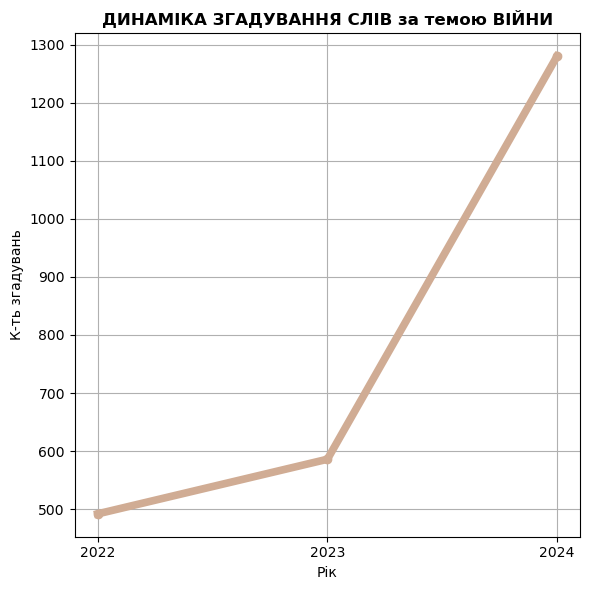

In [1673]:
df_result = pd.DataFrame(list(total_counts_by_year.items()), columns=['–†—ñ–∫', '–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å'])

plt.figure(figsize=(6, 6))
plt.plot(df_result['–†—ñ–∫'], df_result['–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å'], marker='o', linestyle='-', color=plt.cm.pink(0.5), linewidth=5.5)

plt.title('–î–ò–ù–ê–ú–Ü–ö–ê –ó–ì–ê–î–£–í–ê–ù–ù–Ø –°–õ–Ü–í –∑–∞ —Ç–µ–º–æ—é –í–Ü–ô–ù–ò', fontweight='bold')
plt.xlabel('–†—ñ–∫')
plt.ylabel('–ö-—Ç—å –∑–≥–∞–¥—É–≤–∞–Ω—å')
plt.xticks([2022, 2023, 2024])
plt.grid(True)

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ì—Ä–∞—Ñ—ñ–∫ –ø–æ–∫–∞–∑—É—î –º–æ–Ω–æ—Ç–æ–Ω–Ω–µ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –∑ 2022 –ø–æ 2024 —Ä—ñ–∫, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ —ñ–Ω—Ç–µ—Ä–µ—Å —ñ –æ–±—ñ–∑–Ω–∞–Ω—ñ—Å—Ç—å —Å–µ—Ä–µ–¥ –º–æ–ª–æ–¥—ñ –Ω–µ –∑–º–µ–Ω—à—É—é—Ç—å—Å—è, –∞, –Ω–∞–≤–ø–∞–∫–∏, –∑—Ä–æ—Å—Ç–∞—é—Ç—å. –¶–µ —î –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–º –ø–æ–∫–∞–∑–Ω–∏–∫–æ–º –ø—ñ–¥–≤–∏—â–µ–Ω–Ω—è —Ä—ñ–≤–Ω—è —Å–≤—ñ–¥–æ–º–æ—Å—Ç—ñ —Å–µ—Ä–µ–¥ –≥—Ä–æ–º–∞–¥—è–Ω –£–∫—Ä–∞—ó–Ω–∏, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —ó—Ö–Ω—é –∞–∫—Ç–∏–≤–Ω—É —É—á–∞—Å—Ç—å —É –æ–±–≥–æ–≤–æ—Ä–µ–Ω–Ω—è—Ö –≤–∞–∂–ª–∏–≤–∏—Ö —Å–æ—Ü—ñ–∞–ª—å–Ω–∏—Ö —Ç–∞ –ø–æ–ª—ñ—Ç–∏—á–Ω–∏—Ö —Ç–µ–º.

## **–ú–û–í–ù–ï –ü–ò–¢–ê–ù–ù–Ø**

## 19. –†–æ–∑–ø–æ–¥—ñ–ª –º–æ–≤ —É —á–∞—Ç–∞—Ö

–ü—Ä–æ–¥–æ–≤–∂—É—é—á–∏ –ø—ñ–¥—Å—É–º–∫–∏ –ø. 18, –±—É–ª–æ –≤–∏—Ä—ñ—à–µ–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏ —Ä–æ–∑–ø–æ–¥—ñ–ª –º–æ–≤ —É —á–∞—Ç–∞—Ö. –¶–µ–π –∞–Ω–∞–ª—ñ–∑ –¥–æ–∑–≤–æ–ª—è—î –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —è–∫–∏–º–∏ –º–æ–≤–∞–º–∏ —Å–ø—ñ–ª–∫—É—é—Ç—å—Å—è –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç–∏, —â–æ –º–æ–∂–µ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—Ç–∏ –≤–ø–ª–∏–≤ –º–æ–≤–Ω–æ—ó –ø–æ–ª—ñ—Ç–∏–∫–∏ –Ω–∞ –≤–∑–∞—î–º–æ–¥—ñ—é —Å–µ—Ä–µ–¥ –º–æ–ª–æ–¥—ñ.

In [1272]:
def clean_text(text):
    return re.sub(r"[^\w—ñ—ó—î“ë–Ü–á–Ñ“ê–∞-—è–ê-–Ø—ë–Åa-zA-Z ]", "", text)

In [1273]:
def detect_language(word):
    ukr_letters = set("—ñ—ó—î“ë–Ü–á–Ñ“ê")
    rus_letters = set("—ã—ç—ë—ä–´–≠–Å–™")
    eng_letters = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")

    if any(char in ukr_letters for char in word):
        return "–£–∫—Ä–∞—ó–Ω—Å—å–∫–∞"
    elif any(char in rus_letters for char in word):
        return "–†–æ—Å—ñ–π—Å—å–∫–∞"
    elif all(char in eng_letters for char in word) and len(word) > 1:
        return "–ê–Ω–≥–ª—ñ–π—Å—å–∫–∞"
    return "–Ü–Ω—à–∞"

In [1274]:
all_words = []

In [1275]:
if 'message' in df.columns:
    df = df[df['message'].notna()]
    df['message'] = df['message'].astype(str).apply(clean_text)

In [1276]:
 words = " ".join(df['message']).split()
 words = [word for word in words if len(word) > 1]  
 all_words.extend(words)

In [1277]:
language_counts = Counter(detect_language(word) for word in all_words)

filtered_counts = {lang: language_counts[lang] for lang in ["–£–∫—Ä–∞—ó–Ω—Å—å–∫–∞", "–†–æ—Å—ñ–π—Å—å–∫–∞", "–ê–Ω–≥–ª—ñ–π—Å—å–∫–∞"]}
total_filtered = sum(filtered_counts.values())

normalized_percentages = {lang: (count / total_filtered) * 100 for lang, count in filtered_counts.items()}

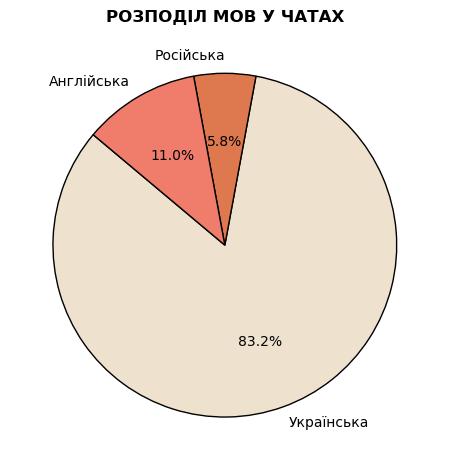

In [1681]:
plt.pie(
    normalized_percentages.values(),
    labels=normalized_percentages.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['#EEE2CF', '#DE784F', '#F07D6C'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("–†–û–ó–ü–û–î–Ü–õ –ú–û–í –£ –ß–ê–¢–ê–•", fontweight='bold')
plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –£–∫—Ä–∞—ó–Ω—Å—å–∫–∞ –º–æ–≤–∞ –º–∞—î –≤–µ–ª–∏–∫—É –ø–µ—Ä–µ–≤–∞–≥—É –Ω–∞–¥ —ñ–Ω—à–∏–º–∏ –¥–≤–æ–º–∞ ‚Äî –∞–Ω–≥–ª—ñ–π—Å—å–∫–æ—é —Ç–∞ —Ä–æ—Å—ñ–π—Å—å–∫–æ—é. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø—ñ–¥–≤–∏—â–µ–Ω—É –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å —Ç–∞ –∑–Ω–∞—á–µ–Ω–Ω—è —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—ó –º–æ–≤–∏ —Å–µ—Ä–µ–¥ –º–æ–ª–æ–¥—ñ, –∑–æ–∫—Ä–µ–º–∞ —É –∫–æ–Ω—Ç–µ–∫—Å—Ç—ñ –Ω–∞—Ü—ñ–æ–Ω–∞–ª—å–Ω–æ—ó —ñ–¥–µ–Ω—Ç–∏—á–Ω–æ—Å—Ç—ñ. 

## 20. –†–æ–∑–ø–æ–¥—ñ–ª –º–æ–≤ —É —á–∞—Ç–∞—Ö (–ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è)

–ü—Ä–æ–¥–æ–≤–∂—É—é—á–∏ –ø. 19, –ø—Ä–æ–≤–µ–¥–µ–º–æ –∞–Ω–∞–ª—ñ–∑, —è–∫ –∑–º—ñ–Ω–∏–ª–∞—Å—è —á–∞—Å—Ç–∫–∞ –≤–∂–∏–≤–∞–Ω–Ω—è —Ä–æ—Å—ñ–π—Å—å–∫–æ—ó —Ç–∞ —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—ó –º–æ–≤ —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤. –¶–µ –¥–æ–∑–≤–æ–ª–∏—Ç—å –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —á–∏ —î —Ç–µ–Ω–¥–µ–Ω—Ü—ñ—è –¥–æ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—ó –º–æ–≤–∏, —â–æ –º–æ–∂–µ –±—É—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –ø–æ—Å–∏–ª–µ–Ω–Ω—è –Ω–∞—Ü—ñ–æ–Ω–∞–ª—å–Ω–æ—ó —Å–≤—ñ–¥–æ–º–æ—Å—Ç—ñ —Ç–∞ –ø—ñ–¥—Ç—Ä–∏–º–∫–∏ —É–∫—Ä–∞—ó–Ω—Å—å–∫–æ—ó –∫—É–ª—å—Ç—É—Ä–∏, –æ—Å–æ–±–ª–∏–≤–æ –≤ —É–º–æ–≤–∞—Ö –≤—ñ–π–Ω–∏.

In [1683]:
all_words_2022_2023 = []
all_words_2024 = []

In [1685]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2022_2023 = df[df['date'].dt.year.isin([2022, 2023])]
df_2024 = df[df['date'].dt.year == 2024]

In [1687]:
words_2022_2023 = " ".join(df_2022_2023['message']).split()
words_2024 = " ".join(df_2024['message']).split()

words_2022_2023 = [word for word in words_2022_2023 if len(word) > 1]
words_2024 = [word for word in words_2024 if len(word) > 1]

all_words_2022_2023.extend(words_2022_2023)
all_words_2024.extend(words_2024)

In [1689]:
def get_language_counts(words):
    language_counts = Counter(detect_language(word) for word in words)
    filtered_counts = {lang: language_counts[lang] for lang in ["–£–∫—Ä–∞—ó–Ω—Å—å–∫–∞", "–†–æ—Å—ñ–π—Å—å–∫–∞", "–ê–Ω–≥–ª—ñ–π—Å—å–∫–∞"]}
    total_filtered = sum(filtered_counts.values())
    return {lang: (count / total_filtered) * 100 for lang, count in filtered_counts.items()}

In [1691]:
percentages_2022_2023 = get_language_counts(all_words_2022_2023)
percentages_2024 = get_language_counts(all_words_2024)

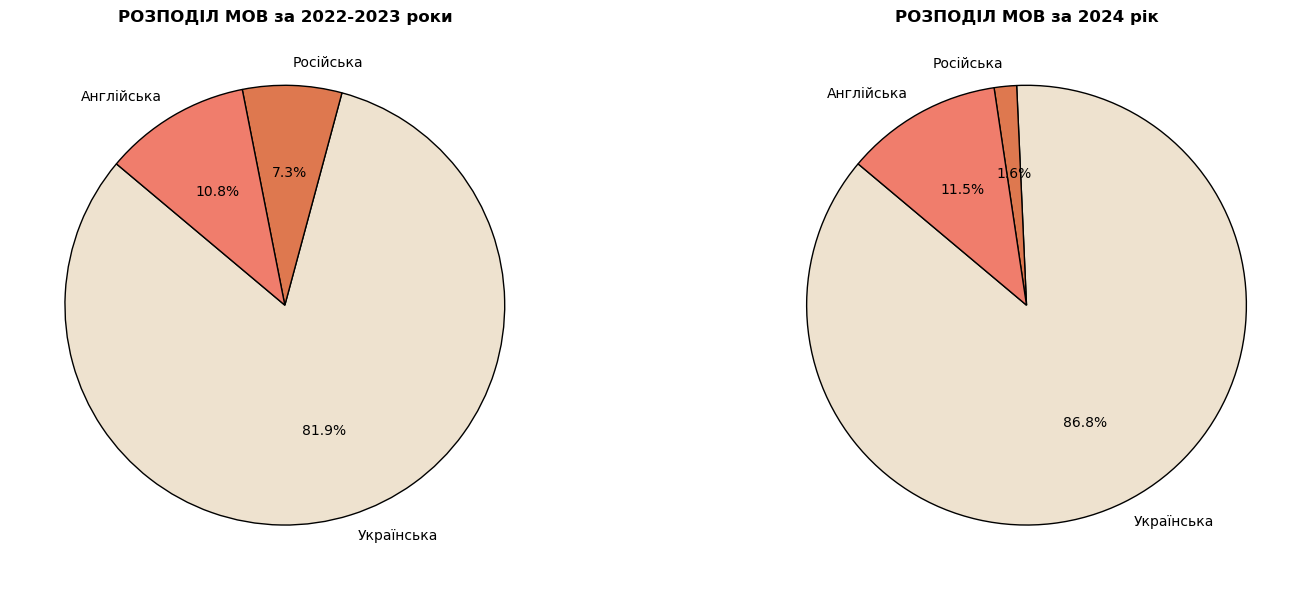

In [1705]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].pie(
    percentages_2022_2023.values(),
    labels=percentages_2022_2023.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['#EEE2CF', '#DE784F', '#F07D6C'],
    wedgeprops={'edgecolor': 'black'}
)
ax[0].set_title("–†–û–ó–ü–û–î–Ü–õ –ú–û–í –∑–∞ 2022-2023 —Ä–æ–∫–∏", fontweight='bold')

ax[1].pie(
    percentages_2024.values(),
    labels=percentages_2024.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['#EEE2CF', '#DE784F', '#F07D6C'],
    wedgeprops={'edgecolor': 'black'}
)
ax[1].set_title("–†–û–ó–ü–û–î–Ü–õ –ú–û–í –∑–∞ 2024 —Ä—ñ–∫", fontweight='bold')

plt.tight_layout()
plt.show()

**–í–ò–°–ù–û–í–û–ö:** –ß–∞—Å—Ç–∫–∞ —Ä–æ—Å—ñ–π—Å—å–∫–æ—ó –º–æ–≤–∏ –ø—Ä–æ—Ç—è–≥–æ–º —Ç—Ä—å–æ—Ö —Ä–æ–∫—ñ–≤ (2022, 2023, 2024) —É —á–∞—Ç–∞—Ö –∞–±—ñ—Ç—É—Ä—ñ—î–Ω—Ç—ñ–≤ –∑–º–µ–Ω—à–∏–ª–∞—Å—è –≤ 4,5 —Ä–∞–∑–∏, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–æ—Å—Ç—É–ø–æ–≤—É –≤—ñ–¥–º–æ–≤—É –≤—ñ–¥ —ó—ó –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è —Å–µ—Ä–µ–¥ –º–æ–ª–æ–¥—ñ. –£ —Ç–æ–π –∂–µ —á–∞—Å, —á–∞—Å—Ç–∫–∞ –∞–Ω–≥–ª—ñ–π—Å—å–∫–æ—ó –º–æ–≤–∏ –∑–º—ñ–Ω–∏–ª–∞—Å—è –Ω–µ–∑–Ω–∞—á–Ω–æ, –∑—Ä–æ—Å—Ç–∞—é—á–∏ –ª–∏—à–µ –Ω–∞ 1%, —â–æ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —Å—Ç–∞–±—ñ–ª—å–Ω–∏–π —ñ–Ω—Ç–µ—Ä–µ—Å –¥–æ –º—ñ–∂–Ω–∞—Ä–æ–¥–Ω–æ—ó –∫–æ–º—É–Ω—ñ–∫–∞—Ü—ñ—ó —Ç–∞ –æ—Å–≤—ñ—Ç–∏ –∑–∞ –∫–æ—Ä–¥–æ–Ω–æ–º, –∞–ª–µ –±–µ–∑ –∑–Ω–∞—á–Ω–∏—Ö –∫–æ–ª–∏–≤–∞–Ω—å —É –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—ñ —Ü—ñ—î—ó –º–æ–≤–∏.